## Importation

In [1]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 3.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import autoviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import tensorflow as tf


#Importing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import scipy.stats as ss
import shap as shap

# set the random seed - consistent
rs = 42


## Loading dataset

In [3]:
df = pd.read_csv('Rugbycology_dataset_v2_new_no_false.csv')

In [4]:
df

Attack Team Defense team       Date                    Level  \
0            SCO          ENG  2/05/2023  Elite Men International   
1            ENG          SCO  2/05/2023  Elite Men International   
2            SCO          ENG  2/05/2023  Elite Men International   
3            ENG          SCO  2/05/2023  Elite Men International   
4            SCO          ENG  2/05/2023  Elite Men International   
...          ...          ...        ...                      ...   
6162         ENG          FRA  3/19/2022  Elite Men International   
6163         FRA          ENG  3/19/2022  Elite Men International   
6164         ENG          FRA  3/19/2022  Elite Men International   
6165         FRA          ENG  3/19/2022  Elite Men International   
6166         FRA          ENG  3/19/2022  Elite Men International   

                Comp    Zone        Origin  Start  Pass  Ruck  ...  \
0     6 Nations 2023  Own 22       Restart    1.0   2.0   2.0  ...   
1     6 Nations 2023  Own 50  Kick fielded    1.0   3.0   3.0  ...   
2     6 Nations 2023  Own 22  Kick fielded    1.0   1.0   2.0  ...   
3     6 Nations 2023  Opp 50  Kick fielded    1.0   NaN   1.0  ...   
4     6 Nations 2023  Own 50         Scrum    1.0   3.0   NaN  ...   
...              ...     ...           ...    ...   ...   ...  ...   
6162  6 Nations 2022  Own 50  Kick fielded    1.0   8.0   3.0  ...   
6163  6 Nations 2022  Own 22       Lineout    1.0   NaN   NaN  ...   
6164  6 Nations 2022  Own 50  Kick fielded    1.0  13.0   4.0  ...   
6165  6 Nations 2022  Own 50         Scrum    1.0   NaN   NaN  ...   
6166  6 Nations 2022  Own 50     Free-kick    1.0   NaN   NaN  ...   

      Retain HR Gain +1  Lose gain neg  Lose Static  Lose Gain 1  \
0                   0.0            0.0          0.0          0.0   
1                   0.0            0.0          0.0          0.0   
2                   0.0            0.0          0.0          1.0   
3                   0.0            0.0          1.0          0.0   
4                   0.0            0.0          0.0          1.0   
...                 ...            ...          ...          ...   
6162                0.0            0.0          0.0          0.0   
6163                0.0            0.0          0.0          0.0   
6164                0.0            0.0          0.0          1.0   
6165                0.0            0.0          0.0          0.0   
6166                0.0            1.0          0.0          0.0   

      Lose Gain +1  Lose HR neg  Lose HR Static  Lose HR Gain 1  \
0              1.0          0.0             0.0             0.0   
1              1.0          0.0             0.0             0.0   
2              0.0          0.0             0.0             0.0   
3              0.0          0.0             0.0             0.0   
4              0.0          0.0             0.0             0.0   
...            ...          ...             ...             ...   
6162           1.0          0.0             0.0             0.0   
6163           1.0          0.0             0.0             0.0   
6164           0.0          0.0             0.0             0.0   
6165           0.0          0.0             0.0             0.0   
6166           0.0          0.0             0.0             0.0   

      Lose HR Gain +1  OUTCOME  
0                 0.0      Win  
1                 0.0     Lose  
2                 0.0      Win  
3                 0.0     Lose  
4                 0.0      Win  
...               ...      ...  
6162              0.0     Lose  
6163              0.0      Win  
6164              0.0     Lose  
6165              0.0      Win  
6166              0.0      Win  

[6167 rows x 32 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Attack Team        6166 non-null   object 
 1   Defense team       6166 non-null   object 
 2   Date               6166 non-null   object 
 3   Level              6166 non-null   object 
 4   Comp               6166 non-null   object 
 5   Zone               6166 non-null   object 
 6   Origin             6166 non-null   object 
 7   Start              6166 non-null   float64
 8   Pass               3154 non-null   float64
 9   Ruck               3051 non-null   float64
 10  Clear              2410 non-null   float64
 11  Contest            971 non-null    float64
 12  Score              6166 non-null   float64
 13  Time               2441 non-null   float64
 14  Retain NEG         6166 non-null   float64
 15  Retain Static      6166 non-null   float64
 16  Retain Gain 1      6166 

Deleting some columns as it won't be necessary to use

In [6]:
df.drop(['Retain Score','Retain NEG', 'Retain Static', 'Retain Gain 1', 'Retain Gain +1', 'Retain HR neg', 'Retain HR Static', 'Retain HR Gain 1', 'Retain HR Gain +1', 'Lose gain neg', 'Lose Gain 1', 'Lose Gain +1', 'Lose HR neg', 'Lose HR Static', 'Lose HR Gain 1', 'Lose HR Gain +1', 'Lose Static','OUTCOME'], axis=1, inplace=True)


Dropping the "Super 2023" game, as is different from the international league

In [7]:
# Filter the data
data = df[df['Comp'] != 'Super 2023']

In [8]:
data

Attack Team Defense team       Date                    Level  \
0            SCO          ENG  2/05/2023  Elite Men International   
1            ENG          SCO  2/05/2023  Elite Men International   
2            SCO          ENG  2/05/2023  Elite Men International   
3            ENG          SCO  2/05/2023  Elite Men International   
4            SCO          ENG  2/05/2023  Elite Men International   
...          ...          ...        ...                      ...   
6162         ENG          FRA  3/19/2022  Elite Men International   
6163         FRA          ENG  3/19/2022  Elite Men International   
6164         ENG          FRA  3/19/2022  Elite Men International   
6165         FRA          ENG  3/19/2022  Elite Men International   
6166         FRA          ENG  3/19/2022  Elite Men International   

                Comp    Zone        Origin  Start  Pass  Ruck  Clear  Contest  \
0     6 Nations 2023  Own 22       Restart    1.0   2.0   2.0    1.0      NaN   
1     6 Nations 2023  Own 50  Kick fielded    1.0   3.0   3.0    1.0      NaN   
2     6 Nations 2023  Own 22  Kick fielded    1.0   1.0   2.0    1.0      NaN   
3     6 Nations 2023  Opp 50  Kick fielded    1.0   NaN   1.0    NaN      NaN   
4     6 Nations 2023  Own 50         Scrum    1.0   3.0   NaN    1.0      NaN   
...              ...     ...           ...    ...   ...   ...    ...      ...   
6162  6 Nations 2022  Own 50  Kick fielded    1.0   8.0   3.0    NaN      NaN   
6163  6 Nations 2022  Own 22       Lineout    1.0   NaN   NaN    1.0      NaN   
6164  6 Nations 2022  Own 50  Kick fielded    1.0  13.0   4.0    NaN      NaN   
6165  6 Nations 2022  Own 50         Scrum    1.0   NaN   NaN    NaN      NaN   
6166  6 Nations 2022  Own 50     Free-kick    1.0   NaN   NaN    NaN      NaN   

      Score  Time  
0       0.0   1.0  
1       0.0   1.0  
2       0.0   1.0  
3       0.0   2.0  
4       0.0   2.0  
...     ...   ...  
6162    0.0  74.0  
6163    0.0  76.0  
6164    0.0  77.0  
6165    0.0  79.0  
6166    0.0  80.0  

[6029 rows x 14 columns]

In [9]:
# Drop the rows from the original DataFrame
data_drop = df.drop(data.index)

In [10]:
data_drop

Attack Team Defense team        Date                    Level  \
4547        REDS        CANES  11/26/2022  Elite Men International   
4548        REDS        CANES  11/26/2022  Elite Men International   
4549       CANES         REDS  11/26/2022  Elite Men International   
4550        REDS        CANES  11/26/2022  Elite Men International   
4551        REDS        CANES  11/26/2022  Elite Men International   
...          ...          ...         ...                      ...   
4680        REDS        CANES  11/26/2022  Elite Men International   
4681       CANES         REDS  11/26/2022  Elite Men International   
4682       CANES         REDS  11/26/2022  Elite Men International   
4683       CANES         REDS  11/26/2022  Elite Men International   
4684       CANES         REDS  11/26/2022  Elite Men International   

            Comp    Zone    Origin  Start  Pass  Ruck  Clear  Contest  Score  \
4547  Super 2023  Own 50   Restart    1.0   NaN   NaN    NaN      NaN    0.0   
4548  Super 2023  Own 50     Scrum    1.0   9.0   7.0    NaN      NaN    0.0   
4549  Super 2023  Own 50  Turnover    1.0   1.0   2.0    NaN      NaN    0.0   
4550  Super 2023  Opp 50   Penalty    1.0   NaN   NaN    NaN      NaN    3.0   
4551  Super 2023  Own 22   Restart    1.0   1.0   2.0    NaN      1.0    0.0   
...          ...     ...       ...    ...   ...   ...    ...      ...    ...   
4680  Super 2023  Opp 22   Lineout    1.0   NaN   1.0    NaN      NaN    0.0   
4681  Super 2023  Own 22   Penalty    1.0   NaN   NaN    1.0      NaN    0.0   
4682  Super 2023  Own 50   Lineout    1.0   NaN   NaN    NaN      NaN    0.0   
4683  Super 2023  Own 50   Penalty    1.0   NaN   NaN    1.0      NaN    0.0   
4684  Super 2023  Opp 50   Lineout    1.0  11.0   6.0    NaN      NaN    5.0   

      Time  
4547   NaN  
4548   NaN  
4549   NaN  
4550   NaN  
4551   NaN  
...    ...  
4680   NaN  
4681   NaN  
4682   NaN  
4683   NaN  
4684   NaN  

[138 rows x 14 columns]

An export error was found in the dataset, normally, in Rugby games, they play against each other twice, and it was found that one team played just once (Aus vs NZ) and the another played three times (Aus vs SA). It was discovered that the third game from Aus vs SA is actually AUS vs SA.

In [11]:
# Defining the data to correct
date_to_correct = '9/15/2022'

# Apply the corrections to the data
mask = (data['Date'] == date_to_correct)
data.loc[mask, 'Attack Team'] = data.loc[mask, 'Attack Team'].replace('SA', 'NZ')
data.loc[mask, 'Defense team'] = data.loc[mask, 'Defense team'].replace('SA', 'NZ')


Also, it was found some data duplicity in the Eng vs Wal on the 2/26/2023 game.

In [12]:
# Define the range of indices with duplicates
start_index = 865
end_index = 983

# Select the subset of the DataFrame within the specified range
subset = data.iloc[start_index-1:end_index]

# Remove duplicates within the subset based on a specific column
subset = subset.drop_duplicates(subset=['Date'])

# Create a DataFrame containing the rows before the specified range
before_subset = data.iloc[:start_index-1]

# Create a DataFrame containing the rows after the specified range
after_subset = data.iloc[end_index:]

# Concatenate the DataFrames to create the final cleaned DataFrame
cleaned_df = pd.concat([before_subset, subset, after_subset], ignore_index=True)

Filling missing values in columns "Pass", "Ruck", "Clear" and "Contest" with 0.
As they are counts, when it's '0' is because it actually didn't happened

In [13]:
cleaned_df[['Pass', 'Ruck', 'Clear', 'Contest']] = cleaned_df[['Pass', 'Ruck', 'Clear', 'Contest']].fillna(0)


In [14]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5912 entries, 0 to 5911
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Attack Team   5911 non-null   object 
 1   Defense team  5911 non-null   object 
 2   Date          5911 non-null   object 
 3   Level         5911 non-null   object 
 4   Comp          5911 non-null   object 
 5   Zone          5911 non-null   object 
 6   Origin        5911 non-null   object 
 7   Start         5911 non-null   float64
 8   Pass          5912 non-null   float64
 9   Ruck          5912 non-null   float64
 10  Clear         5912 non-null   float64
 11  Contest       5912 non-null   float64
 12  Score         5911 non-null   float64
 13  Time          2440 non-null   float64
dtypes: float64(7), object(7)
memory usage: 646.8+ KB


## Time

In this time column, it was added manually the scores times using the matching report (wikipedia)
After that, it was created a code that loops through the data to identify this manual inputs, and then it will calculate the time between the last and next inputed times.

In [15]:
nan_groups = []
in_nan_group = False

for i, val in enumerate(df['Time']):
    if pd.isna(val) and not in_nan_group:
        #Started a new NaN
        start_index = i-1
        in_nan_group = True
    elif not pd.isna(val) and in_nan_group:
        #Ending a NaN
        end_index = i
        nan_groups.append((start_index, end_index))
        in_nan_group = False

cleaned_df['Time'] = cleaned_df['Time'].interpolate(method='linear', limit_direction='both').round(0)


In [16]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5912 entries, 0 to 5911
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Attack Team   5911 non-null   object 
 1   Defense team  5911 non-null   object 
 2   Date          5911 non-null   object 
 3   Level         5911 non-null   object 
 4   Comp          5911 non-null   object 
 5   Zone          5911 non-null   object 
 6   Origin        5911 non-null   object 
 7   Start         5911 non-null   float64
 8   Pass          5912 non-null   float64
 9   Ruck          5912 non-null   float64
 10  Clear         5912 non-null   float64
 11  Contest       5912 non-null   float64
 12  Score         5911 non-null   float64
 13  Time          5912 non-null   float64
dtypes: float64(7), object(7)
memory usage: 646.8+ KB


## Exploratory Analysis

In [17]:
data.describe()

Start         Pass         Ruck        Clear     Contest        Score  \
count  6028.0  3083.000000  2992.000000  2364.000000  954.000000  6028.000000   
mean      1.0     4.231917     2.821190     0.986887    1.002096     0.415229   
std       0.0     4.311718     2.603866     0.127798    0.259137     1.478886   
min       1.0     0.000000    -2.000000     0.000000    0.000000     0.000000   
25%       1.0     1.000000     1.000000     1.000000    1.000000     0.000000   
50%       1.0     3.000000     2.000000     1.000000    1.000000     0.000000   
75%       1.0     5.000000     4.000000     1.000000    1.000000     0.000000   
max       1.0    34.000000    23.000000     2.000000    3.000000     7.000000   

              Time  
count  2441.000000  
mean     38.865219  
std      23.728110  
min       1.000000  
25%      18.000000  
50%      39.000000  
75%      58.000000  
max      86.000000

In [18]:
def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(data, *['Origin'], **{})
chart

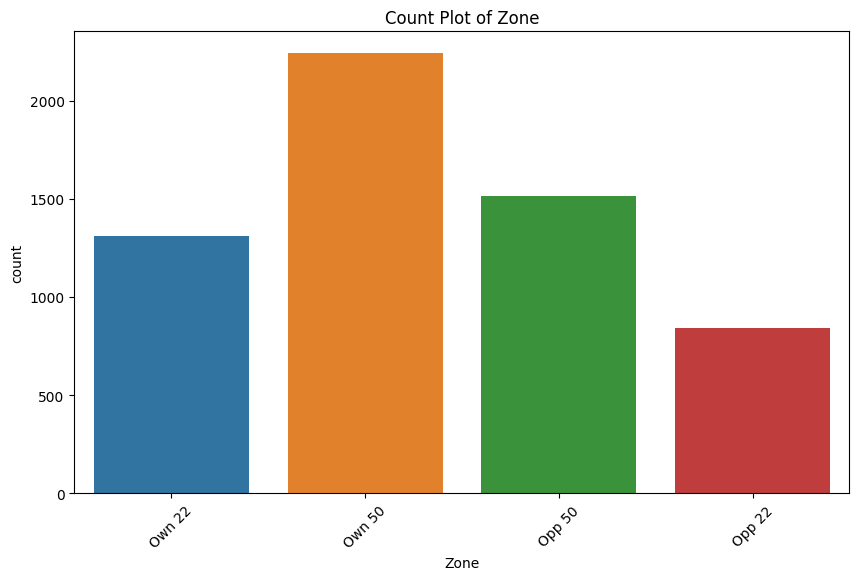

In [19]:
column_to_plot = 'Zone'
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_df, x=column_to_plot)
plt.xlabel(column_to_plot)
plt.title(f'Count Plot of {column_to_plot}')
plt.xticks(rotation=45)
plt.show()

As you can see, we have an error "False"
After checking the dataset, we need to delete the line, as it was a probably exportation error.

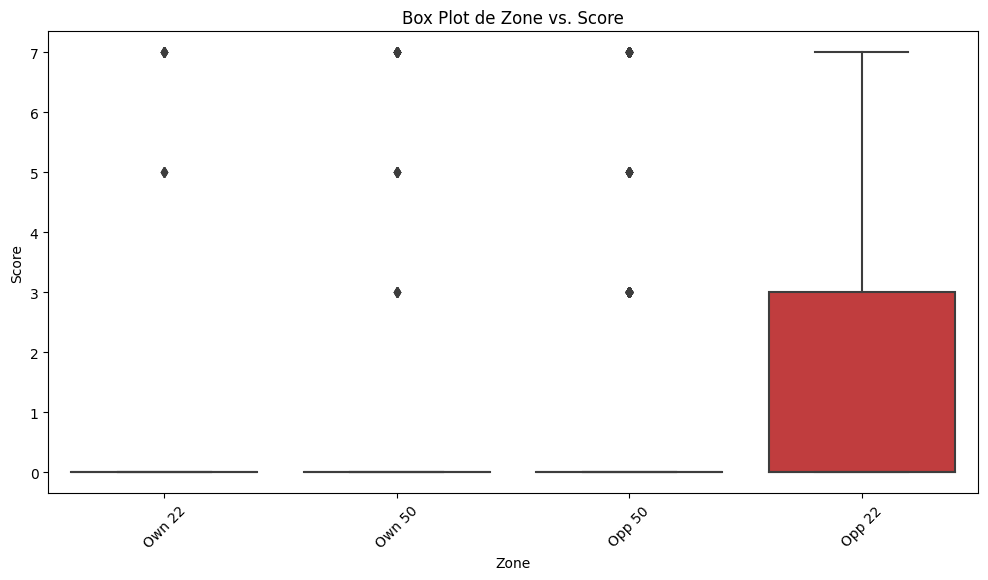

In [20]:
column_to_plot = 'Zone'
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df, x=column_to_plot, y='Score')
plt.xlabel(column_to_plot)
plt.ylabel('Score')
plt.title(f'Box Plot de {column_to_plot} vs. Score')
plt.xticks(rotation=45)
plt.show()


In [21]:
def categorical_histogram(cleaned_df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  cleaned_df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(data, *['Comp'], **{})
chart

In [22]:
def value_plot(cleaned_df, y, figscale=1):
  from matplotlib import pyplot as plt
  cleaned_df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data, *['Ruck'], **{})
chart

In [23]:
def value_plot(cleaned_df, y, figscale=1):
  from matplotlib import pyplot as plt
  cleaned_df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data, *['Pass'], **{})
chart

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


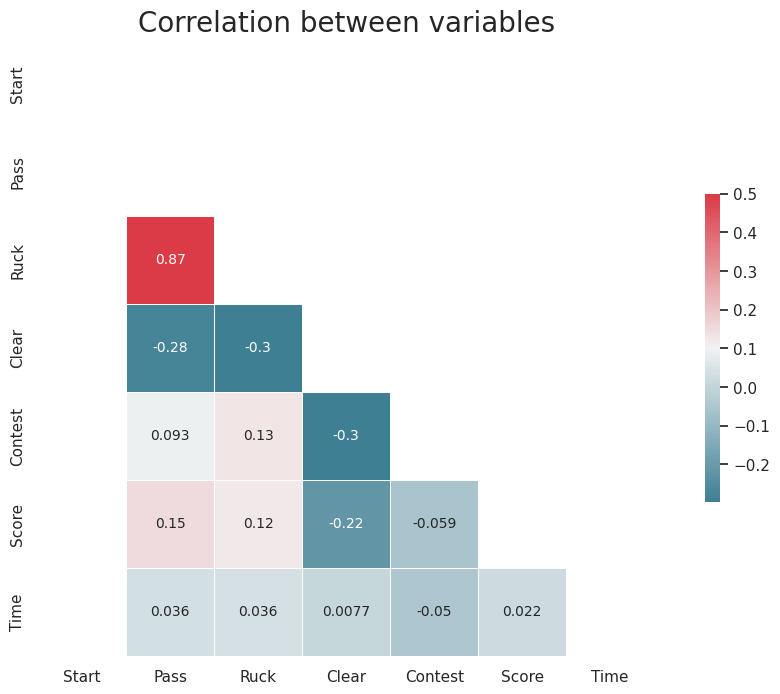

In [24]:
#correlation matrix
correlation_matrix = cleaned_df.corr()
correlation_matrix
sns.set(style='white')

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(13,8))

cmap = sns.diverging_palette(220,10, as_cmap=True)

ax = sns.heatmap(correlation_matrix, mask=mask,
                 cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':10},
                 square=True, xticklabels=True, yticklabels=True, linewidths=.5,
                 cbar_kws={'shrink': .5}, ax=ax)

ax.set_title('Correlation between variables', fontsize=20);

In [25]:
#skewness
data.skew(axis =0, skipna = True).sort_values(ascending = False)

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


Score      3.661543
Pass       2.295112
Ruck       2.253439
Contest    0.459094
Time       0.085666
Start      0.000000
Clear     -5.981400
dtype: float64

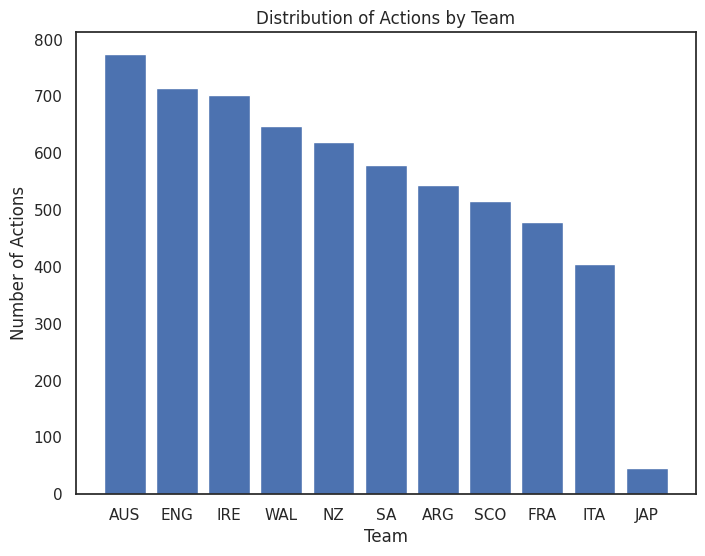

In [26]:
team_counts = data['Attack Team'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(team_counts.index, team_counts.values)
plt.xlabel('Team')
plt.ylabel('Number of Actions')
plt.title('Distribution of Actions by Team')
plt.show()

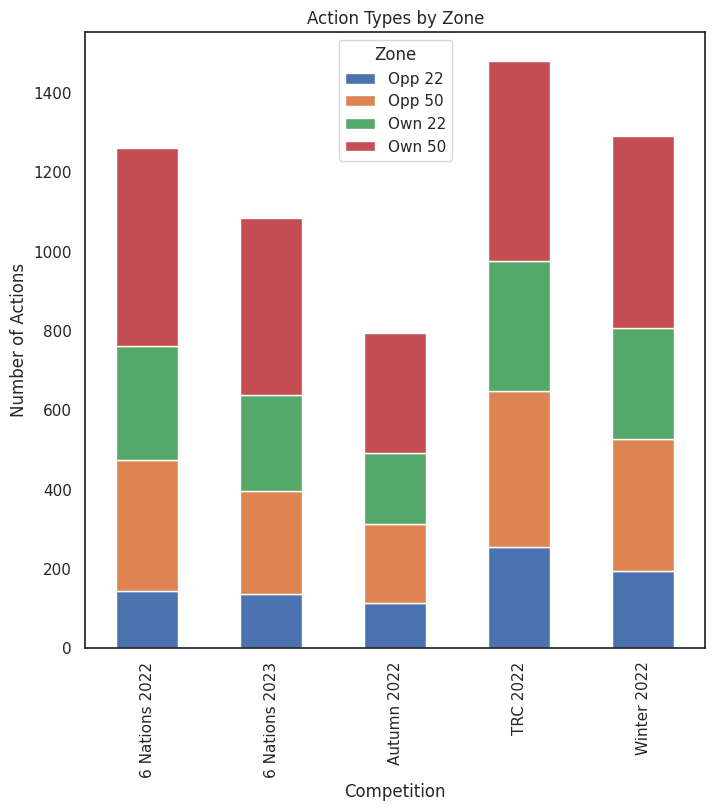

In [27]:
action_zone_counts = cleaned_df.groupby(['Comp', 'Zone']).size().unstack().fillna(0)
action_zone_counts.plot(kind='bar', stacked=True, figsize=(8, 8))
plt.xlabel('Competition')
plt.ylabel('Number of Actions')
plt.title('Action Types by Zone')
plt.show()

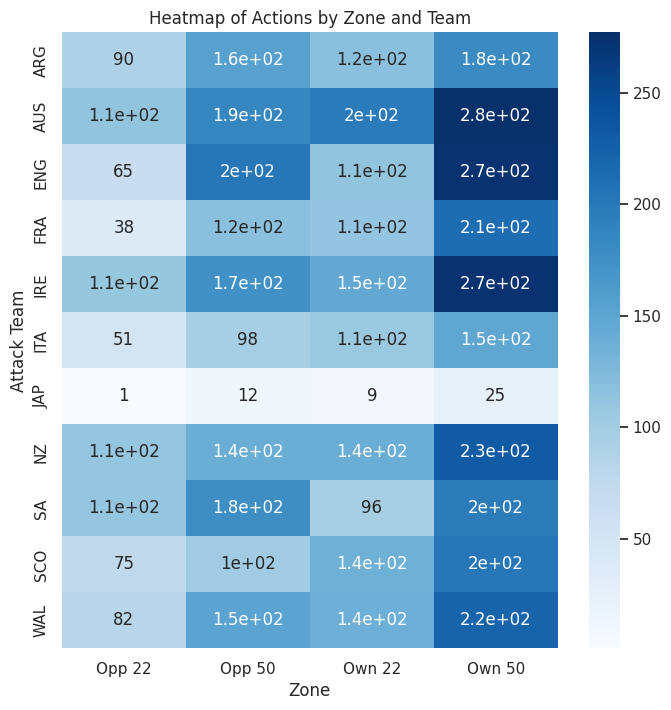

In [28]:
action_zone_team_counts = cleaned_df.groupby(['Attack Team', 'Zone']).size().unstack().fillna(0)
plt.figure(figsize=(8, 8))
sns.heatmap(action_zone_team_counts, annot=True, cmap='Blues')
plt.xlabel('Zone')
plt.ylabel('Attack Team')
plt.title('Heatmap of Actions by Zone and Team')
plt.show()

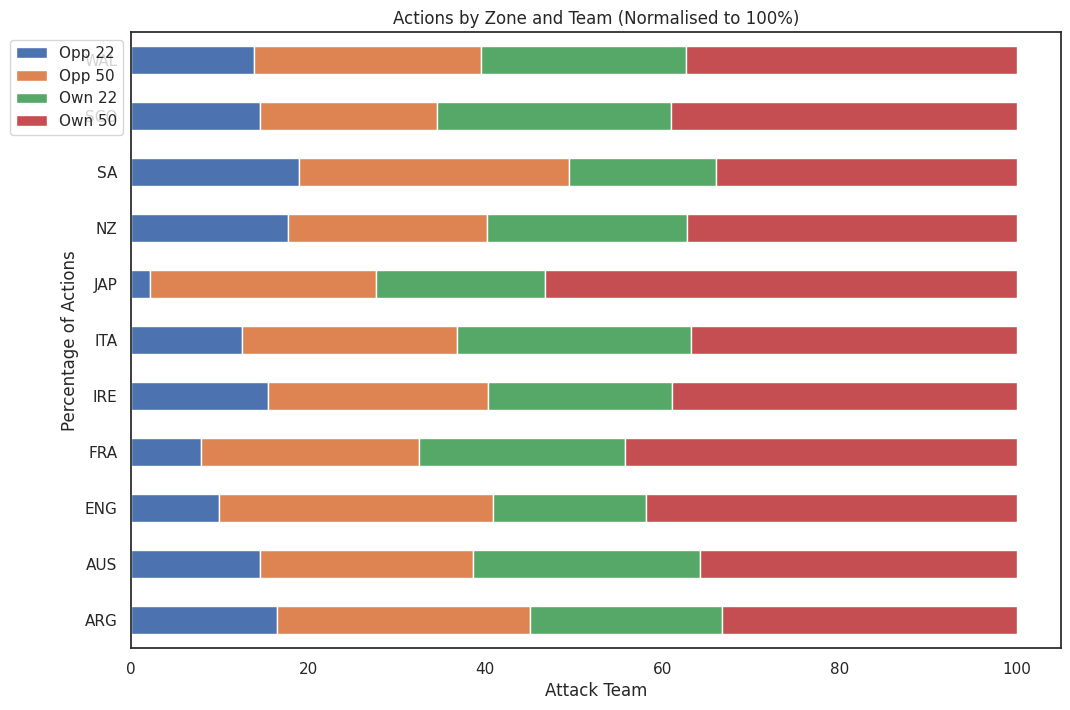

In [29]:
team_zone_counts = cleaned_df.groupby(['Attack Team', 'Zone']).size().unstack()
#normalise the data
team_zone_percentage = team_zone_counts.div(team_zone_counts.sum(axis=1), axis=0) * 100

ax = team_zone_percentage.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.xlabel('Attack Team')
plt.ylabel('Percentage of Actions')
plt.title('Actions by Zone and Team (Normalised to 100%)')
plt.legend(loc='upper right', bbox_to_anchor=(0, 1))

plt.show()


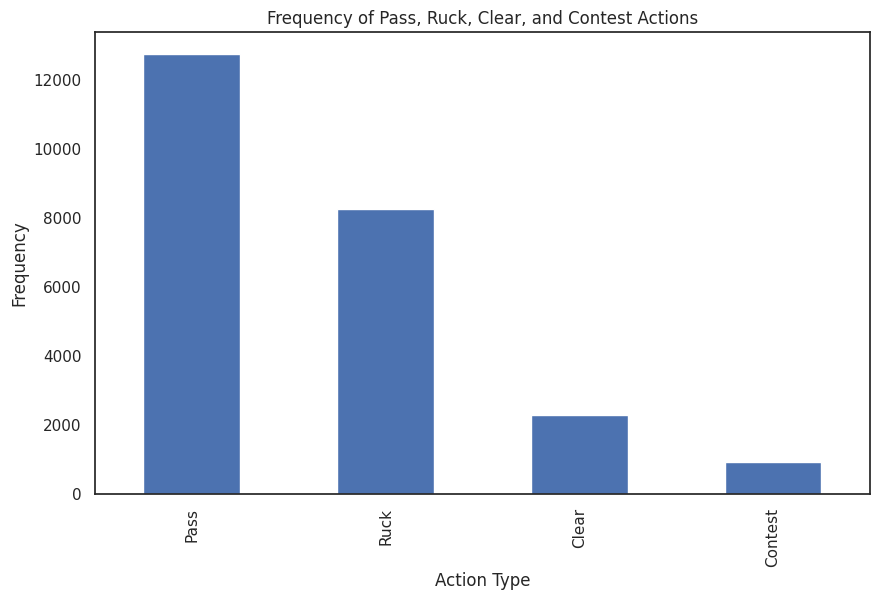

In [30]:
action_counts = cleaned_df[['Pass', 'Ruck', 'Clear', 'Contest']].sum()
plt.figure(figsize=(10, 6))
action_counts.plot(kind='bar')
plt.xlabel('Action Type')
plt.ylabel('Frequency')
plt.title('Frequency of Pass, Ruck, Clear, and Contest Actions')
plt.show()

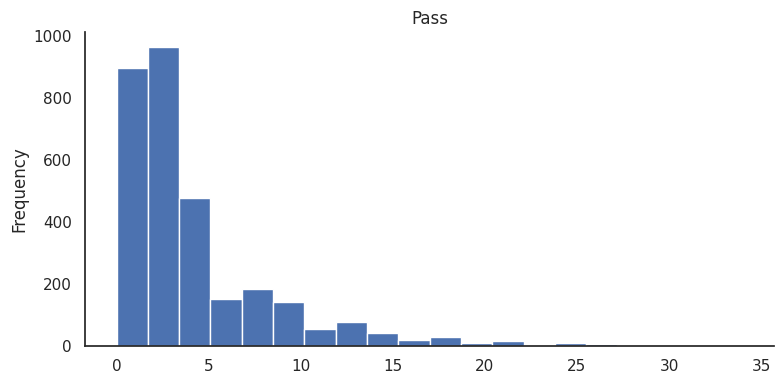

In [31]:
def histogram(cleaned_df, colname, num_bins=20, figscale=1):
    from matplotlib import pyplot as plt
    cleaned_df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.tight_layout()
histogram(data, 'Pass', num_bins=20, figscale=1)


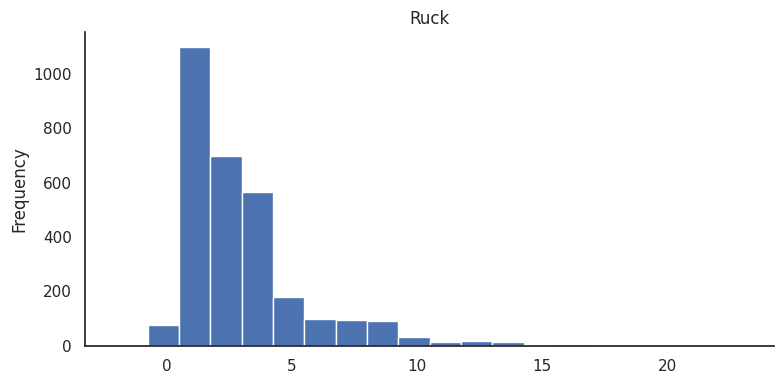

In [32]:
def histogram(cleaned_df, colname, num_bins=20, figscale=1):
    from matplotlib import pyplot as plt
    cleaned_df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.tight_layout()
histogram(data, 'Ruck', num_bins=20, figscale=1)


## Data Umbalance

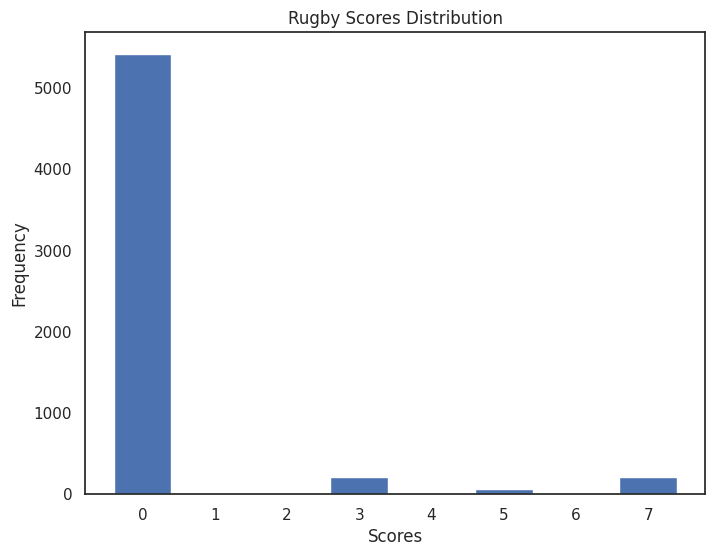

In [33]:
score = cleaned_df['Score'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(score.index, score.values)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Rugby Scores Distribution')
plt.show()


In [34]:
score_df = cleaned_df[['Score']]
minority_class = cleaned_df[cleaned_df['Score'].isin([3, 5, 7])]
majority_class = cleaned_df[cleaned_df['Score'] == 0]

minority_count = len(minority_class)
majority_count = len(majority_class)
count_diff = majority_count - minority_count

oversampled_minority = minority_class.sample(n=count_diff, replace=True)

balanced_df = pd.concat([majority_class, oversampled_minority])

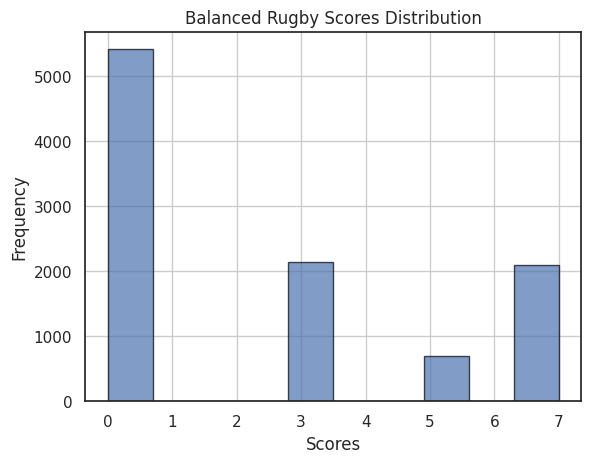

In [35]:
scores = balanced_df['Score']
plt.hist(scores, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Balanced Rugby Scores Distribution')
plt.grid(True)
plt.show()


In [36]:
balanced_df['scored'] = balanced_df['Score'].apply(lambda x: 1 if x in [3, 5, 7] else 0)


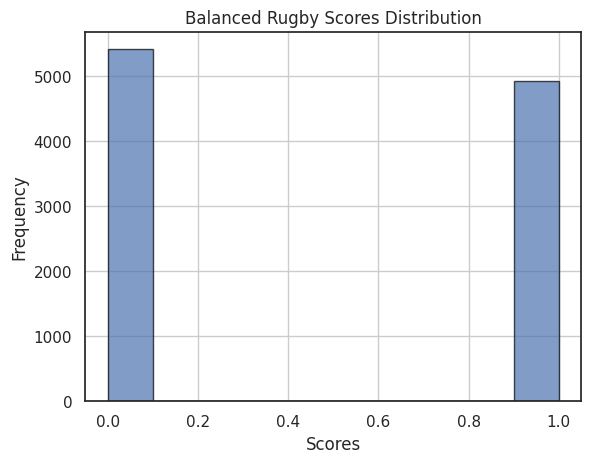

In [37]:
scores = balanced_df['scored']
plt.hist(scores, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Balanced Rugby Scores Distribution')
plt.grid(True)
plt.show()

In [38]:
 new_cleaned_df = balanced_df.drop(columns=['Date','Score','Start','Zone'])

How do the number of rucks, passes, and kicks affect the likelihood of scoring points during a possession?

## Selected columns

In [39]:
selected_columns = ["Clear","Pass","Ruck","Time"]

In [40]:
selected_columns_all = ["Clear", "Pass", "Ruck","Time",'Attack Team', 'Defense team']


## Important functions

In [41]:
#CAB420
def eval_model(model, x_test, y_test):
    # Get predicted probabilities for each class
    pred_probs = model.predict_proba(x_test)

    # Get the predicted class indices (argmax)
    indexes = tf.argmax(pred_probs, axis=-1)
    indexes = indexes.numpy()  # Convert TensorFlow tensor to a NumPy array

    cm = confusion_matrix(y_test, indexes)
    fig = plt.figure(figsize=[5, 5])
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Testing Set Performance')

    c = ConfusionMatrixDisplay(cm, display_labels=range(max(y_test) + 1))  # Adjust the display_labels

    c.plot(ax=ax)

    print(classification_report(y_test, indexes))

In [42]:
#CAB420
def plot_learning_curves(estimator, X, y, title="Learning Curves", cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Plot learning curves for an estimator.

    Parameters:
    - estimator: The machine learning model to plot learning curves for.
    - X: The input features.
    - y: The target variable.
    - title: The title for the plot.
    - cv: Cross-validation strategy (e.g., StratifiedKFold). If None, 5-fold cross-validation will be used.
    - train_sizes: Array of training set sizes to use for plotting.
    """
    train_sizes, train_scores, validation_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation Score")

    plt.legend(loc="best")
    plt.show()

## Random Forest -  umbalanced data - without Attack and Defense

In [43]:
cleaned_df['scored'] = cleaned_df['Score'].apply(lambda x: 1 if x in [3, 5, 7] else 0)

Test Accuracy: 0.9120631341600902

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1642
           1       0.27      0.11      0.15       132

    accuracy                           0.91      1774
   macro avg       0.60      0.54      0.55      1774
weighted avg       0.88      0.91      0.89      1774



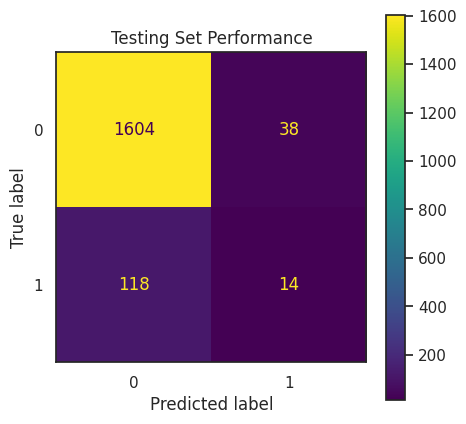

In [44]:
y = cleaned_df['scored']
X = cleaned_df[selected_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest classifier on the training set
rf_classifier_unbalance_clean = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_unbalance_clean.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = rf_classifier_unbalance_clean.predict(X_test)

# Evaluate the model's performance on the test set using accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}\n')


eval_model(rf_classifier_unbalance_clean, X_test, y_test)

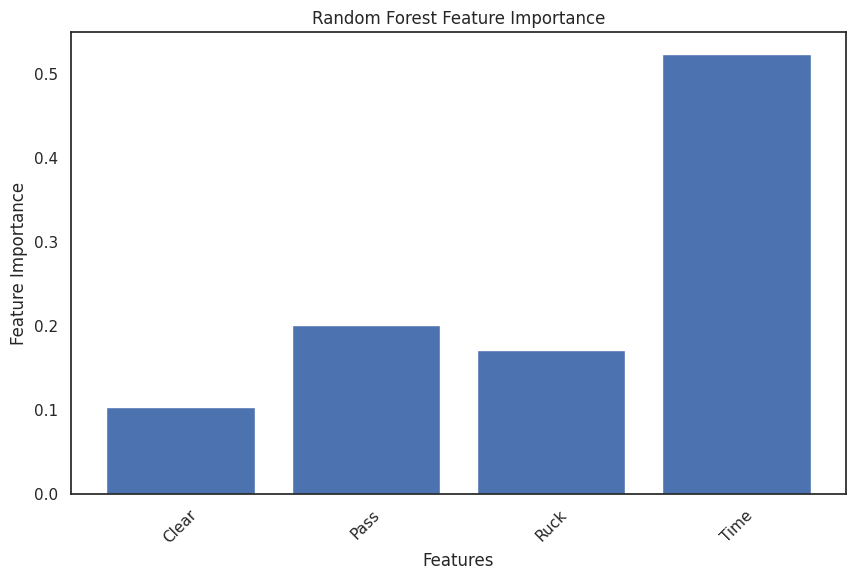

In [45]:
feature_importances = rf_classifier_unbalance_clean.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(selected_columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)
plt.show()


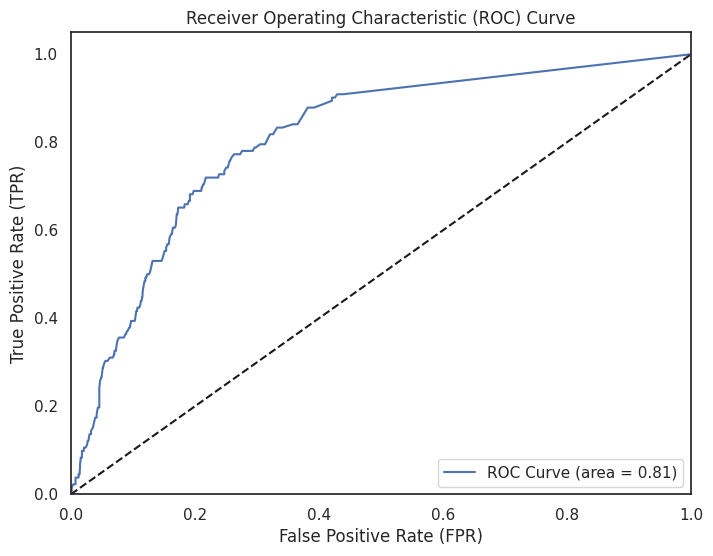

In [46]:
y_probabilities = rf_classifier_unbalance_clean.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_test, y_probabilities)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


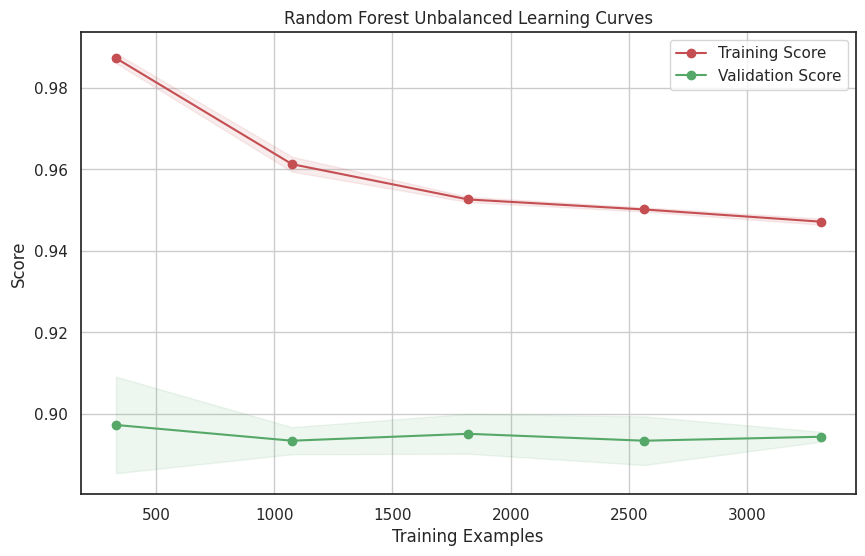

In [47]:
plot_learning_curves(rf_classifier_unbalance_clean, X_train, y_train, title="Random Forest Unbalanced Learning Curves")


In [48]:

# Create a SHAP explainer object
explainer = shap.Explainer(rf_classifier_unbalance_clean, X_train)
# Explain predictions for the entire test dataset and create a summary plot
shap_values = explainer.shap_values(X_test)

 99%|===================| 3526/3548 [00:52<00:00]       

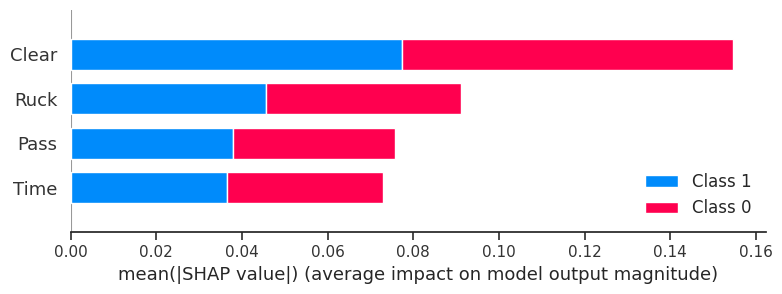

In [49]:
# Create a summary plot for the entire test dataset
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

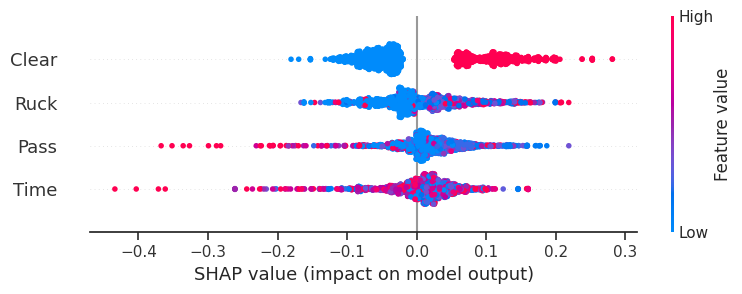

In [50]:
shap.summary_plot(shap_values[0], X_test)

In [51]:
#shap.dependence_plot("Pass", shap_values[0], X_test,interaction_index="Ruck")

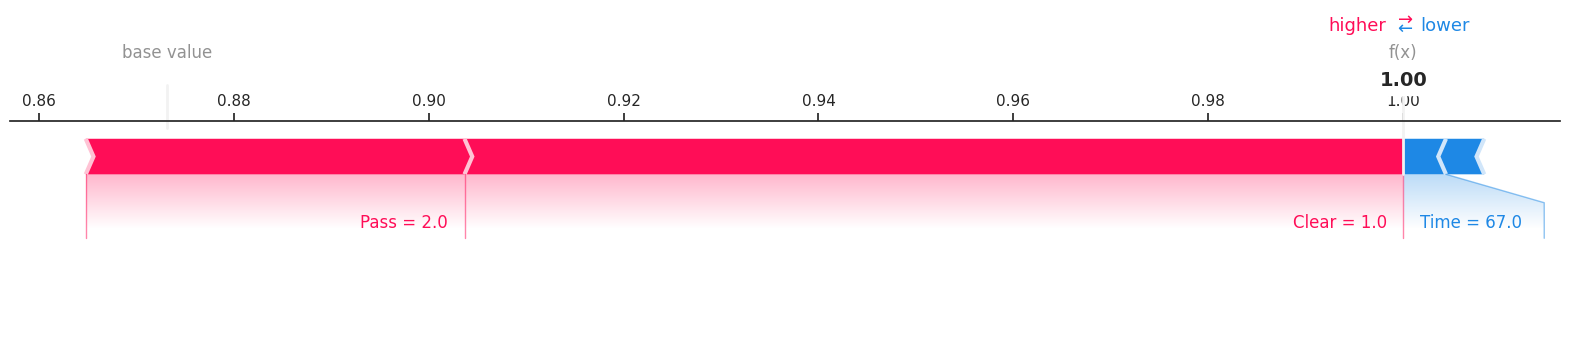

In [52]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)


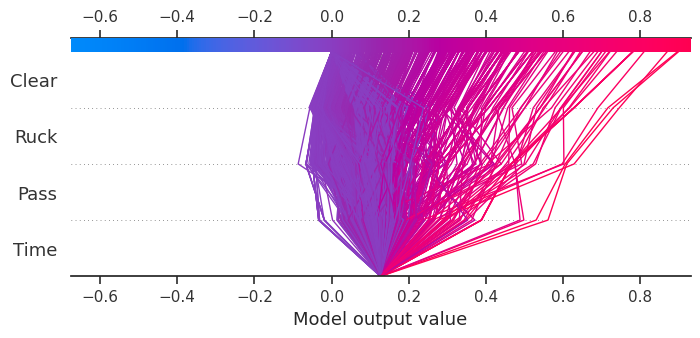

In [53]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns) #class 1

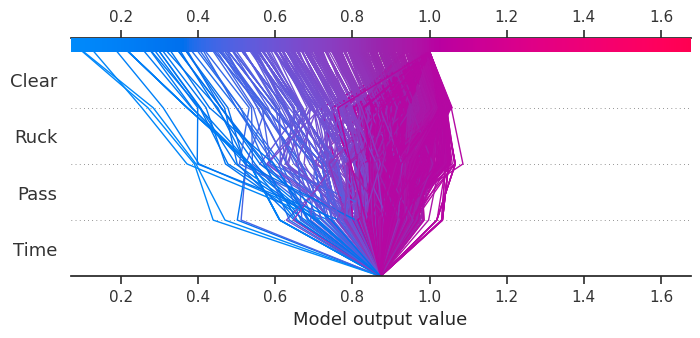

In [54]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test.columns) #class 0

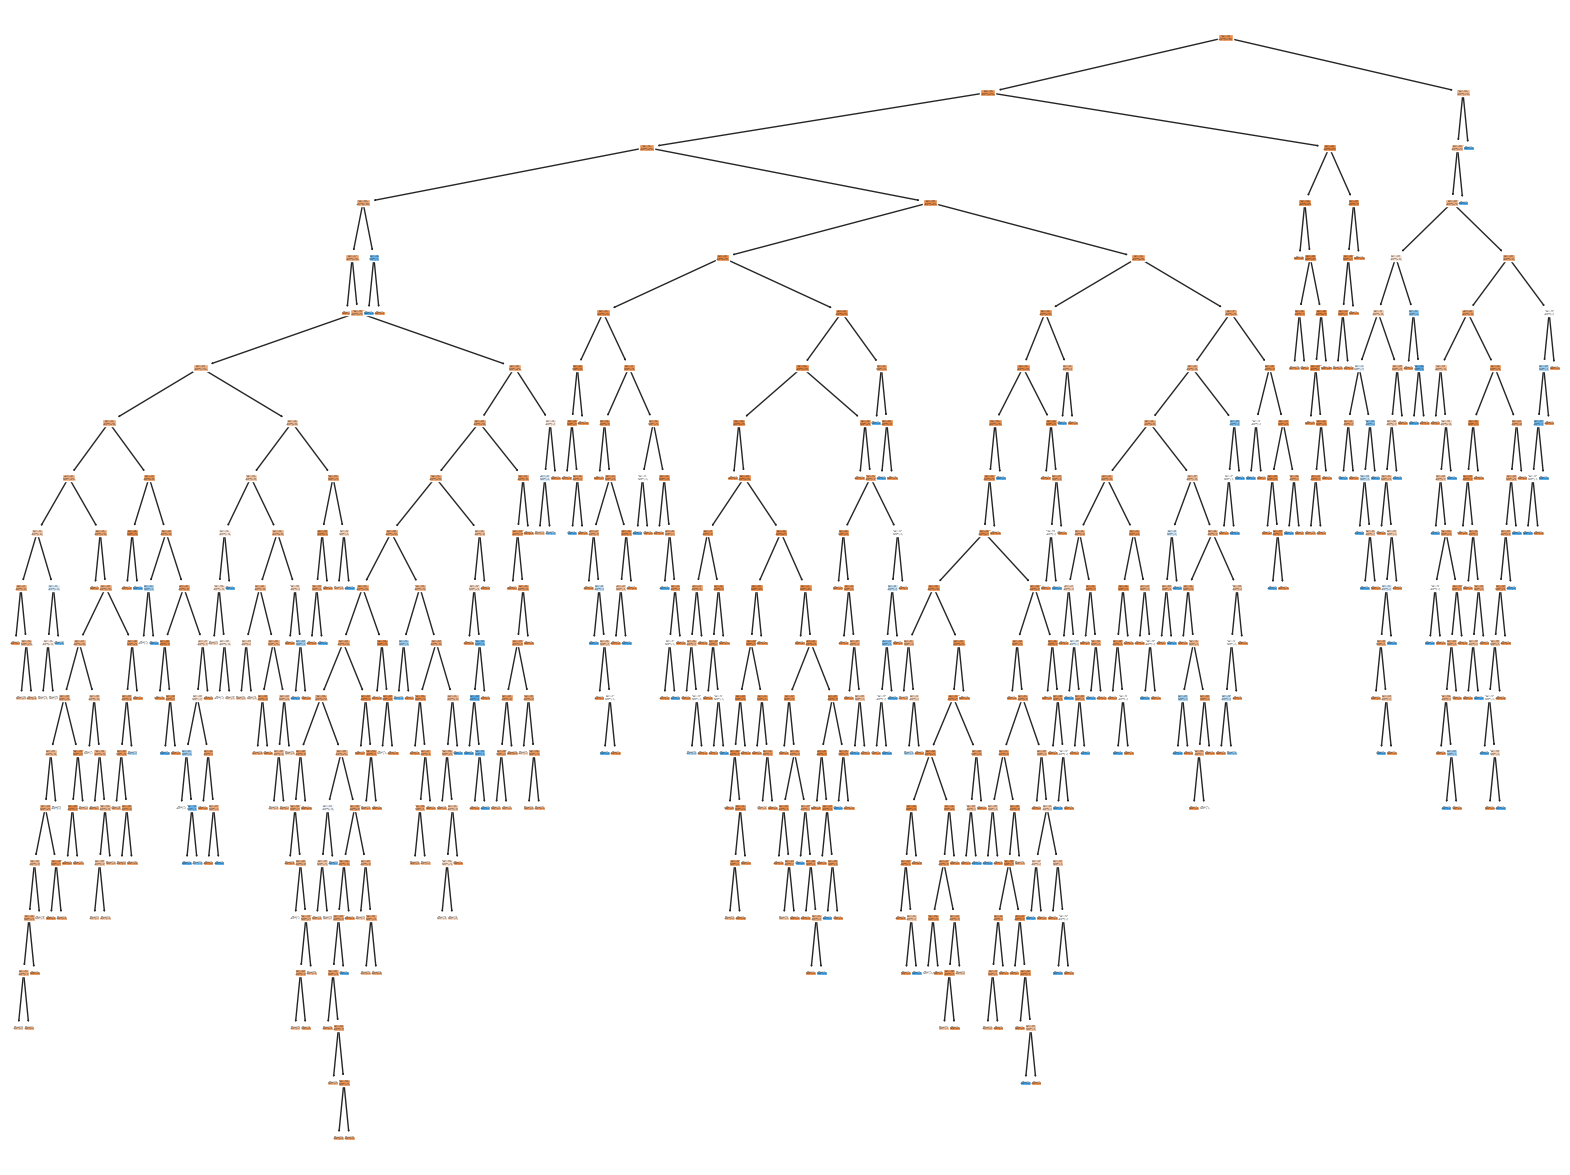

In [55]:
# Plot the decision tree from the ensemble
fig = plt.figure(figsize=(20, 15))
_ = tree.plot_tree(rf_classifier_unbalance_clean.estimators_[0], filled=True)

**Interpretation:**
Despite achieving strong accuracy and an 81% ROC curve, it's important to note that this analysis exhibits a bias towards class "0." This bias stems from the absence of a balanced or oversampled dataset, which results in uneven performance metrics. Notably, the precision and recall for class "1" are significantly lower when compared to those for class "0." Also, the learning curve suggest an overfitting of the data, also, it is showing that the model isn't able to generalise to unseen data, as the dataset is limited.


## Random Forest using the balanced data - Without Attack and Defense

Test Accuracy: 0.8942617666021921

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1657
           1       0.82      0.98      0.90      1445

    accuracy                           0.89      3102
   macro avg       0.90      0.90      0.89      3102
weighted avg       0.91      0.89      0.89      3102



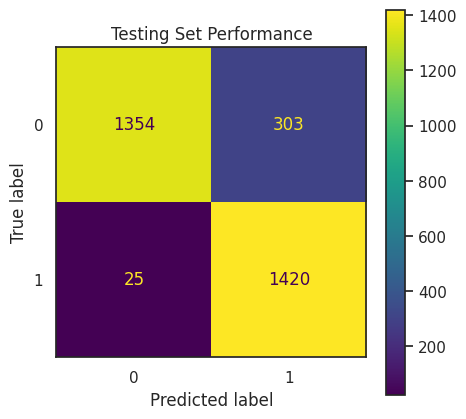

In [56]:
selected_columns = ["Clear","Pass","Ruck","Time"]
y = balanced_df['scored']
X = balanced_df[selected_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_balanced.fit(X_train, y_train)
y_pred = rf_classifier_balanced.predict(X_test)

# Evaluate the model's performance on the test set using accuracy

test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy}\n')

eval_model(rf_classifier_balanced, X_test, y_test)

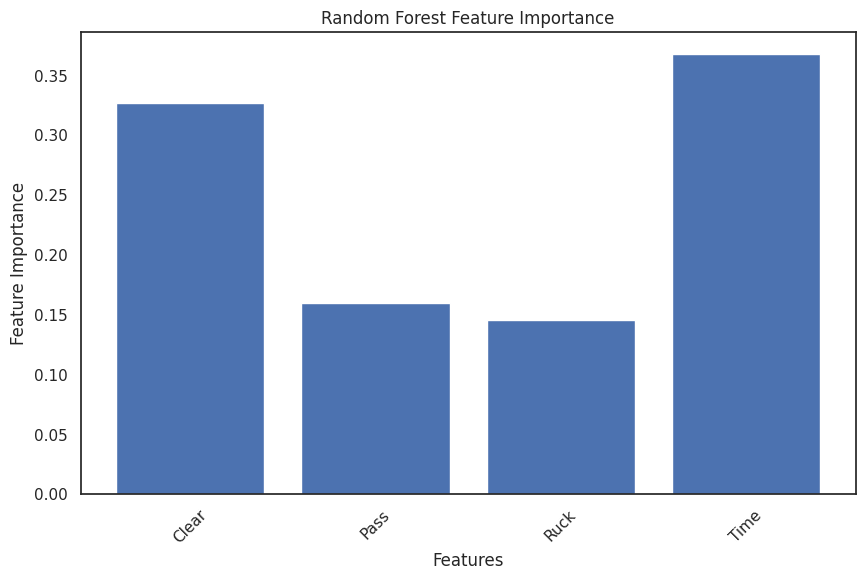

In [57]:
feature_importances = rf_classifier_balanced.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(selected_columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)
plt.show()

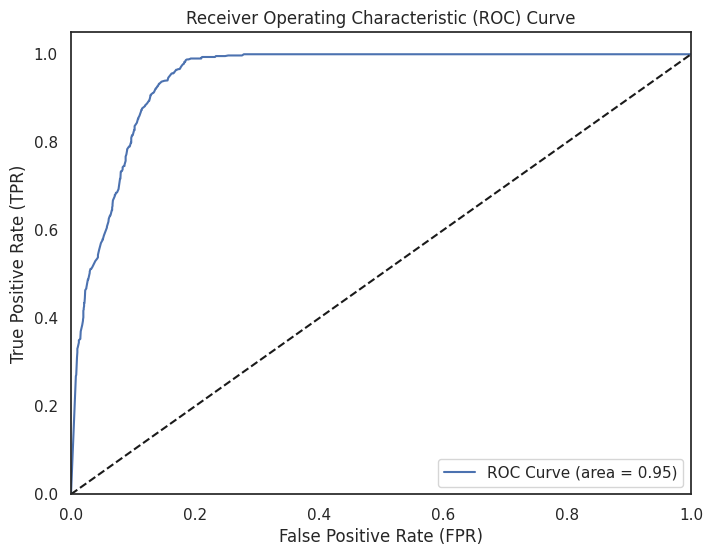

In [58]:
y_probabilities = rf_classifier_balanced.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_test, y_probabilities)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


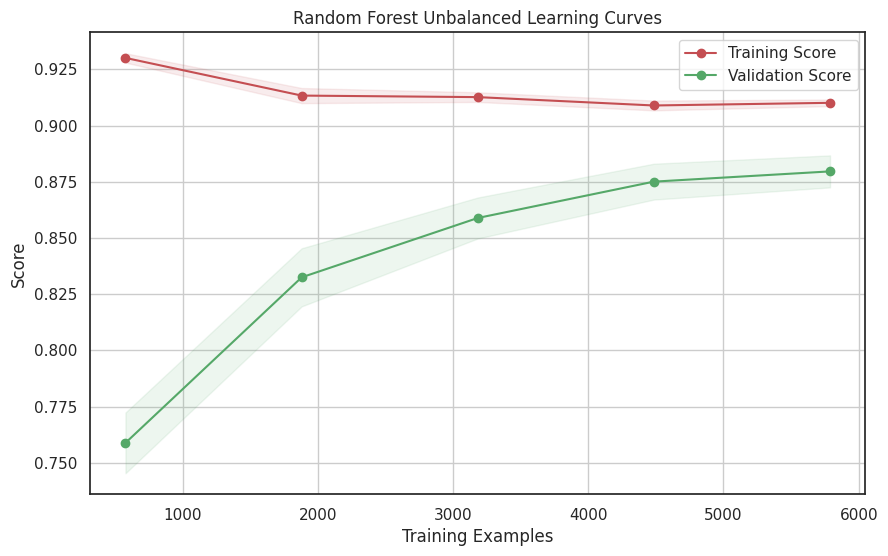

In [59]:
plot_learning_curves(rf_classifier_balanced, X_train, y_train, title="Random Forest Unbalanced Learning Curves")

In [60]:
# Create a SHAP explainer object
explainer = shap.Explainer(rf_classifier_balanced, X_train)
# Explain predictions for the entire test dataset and create a summary plot
shap_values = explainer.shap_values(X_test)

100%|===================| 6191/6204 [01:32<00:00]       

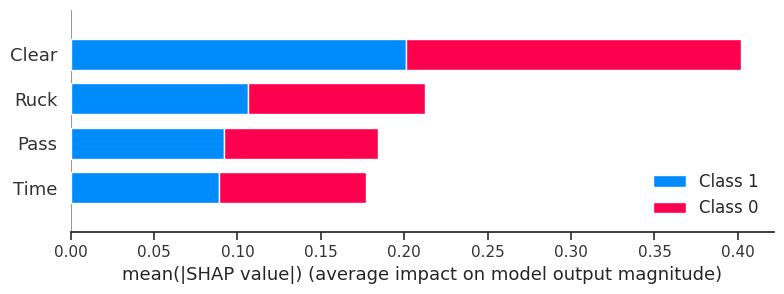

In [61]:
# Create a summary plot for the entire test dataset
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

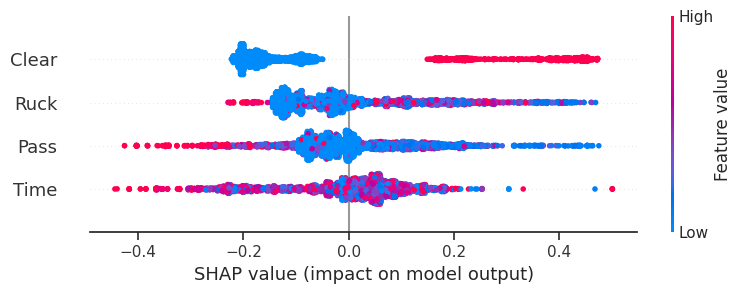

In [62]:
shap.summary_plot(shap_values[0], X_test)


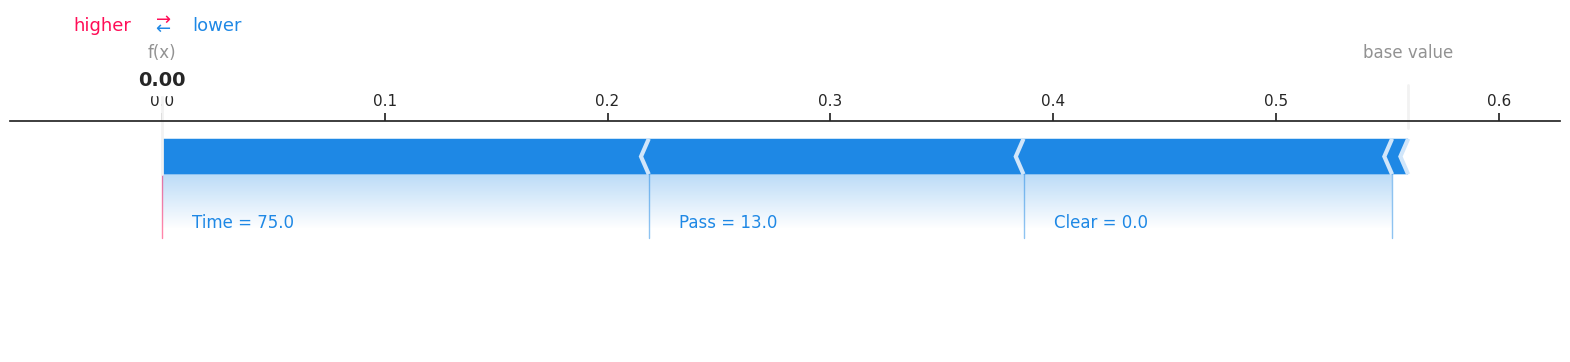

In [63]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

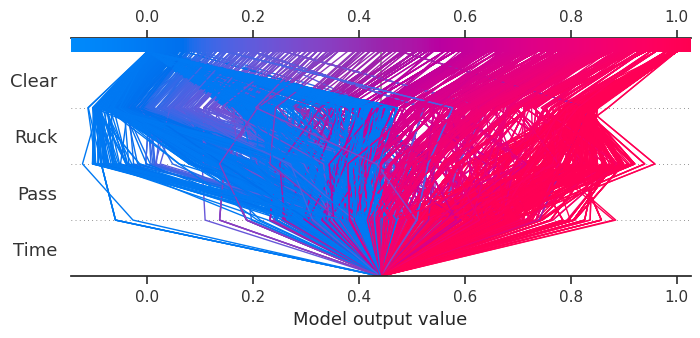

In [64]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns, ignore_warnings=True, show=True)



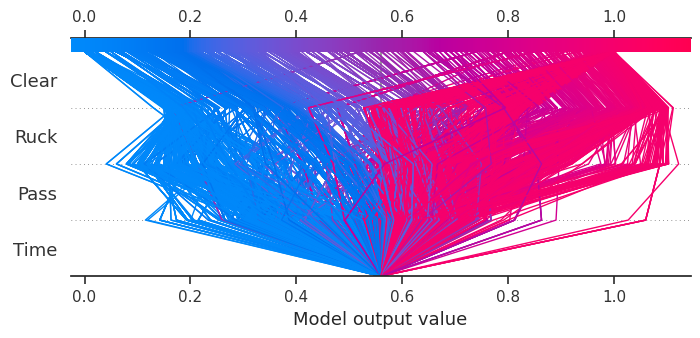

In [65]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test.columns, ignore_warnings=True, show=True)


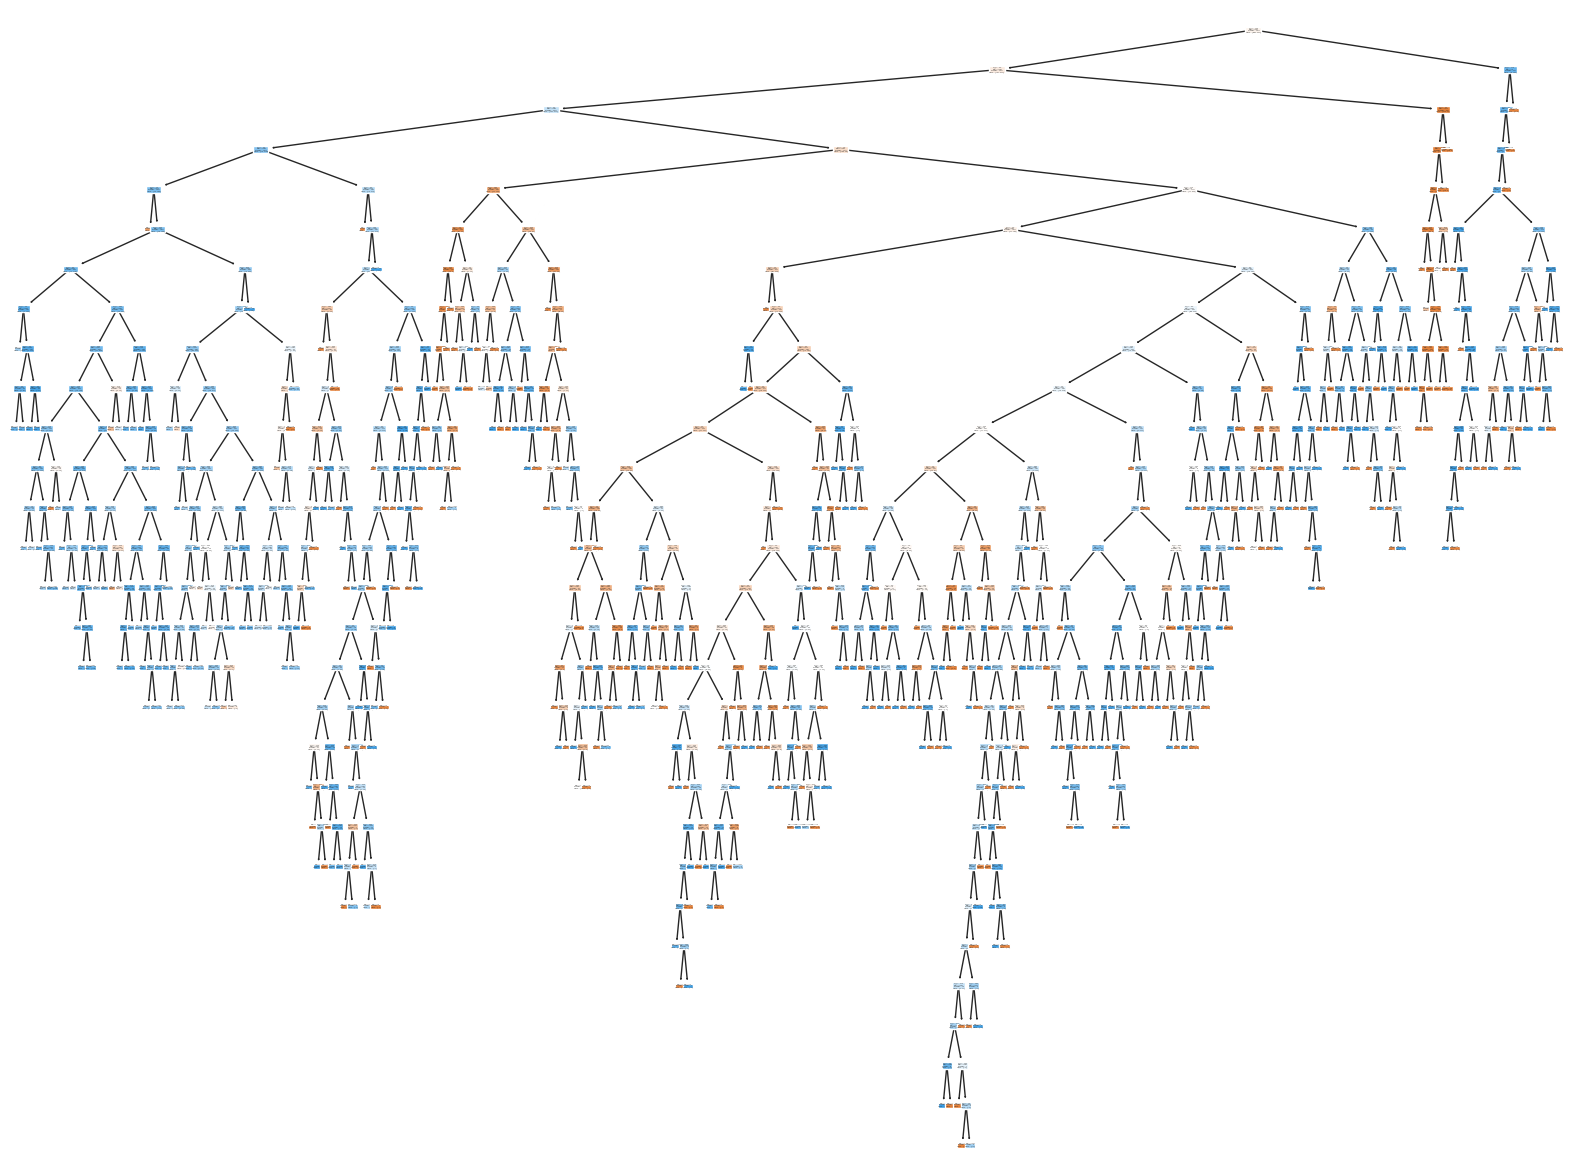

In [66]:
# Plot the decision tree from the ensemble
fig = plt.figure(figsize=(20, 15))
_ = tree.plot_tree(rf_classifier_balanced.estimators_[0], filled=True)


## Balanced dataset after GridSearchCV

We will use GridSearchCV to try to reach a better result, improving our model and getting the best hyperparameters

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1657
           1       0.82      0.98      0.90      1445

    accuracy                           0.89      3102
   macro avg       0.90      0.90      0.89      3102
weighted avg       0.91      0.89      0.89      3102

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.8926
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1657
           1       0.82      0.98      0.90      1445

    accuracy                           0.89      3102
   macro avg       0.90      0.90      0.89      3102
weighted avg       0.91      0.89      0.89      3102

Confusion Matrix:
[[1347  310]
 [  23 1422]]


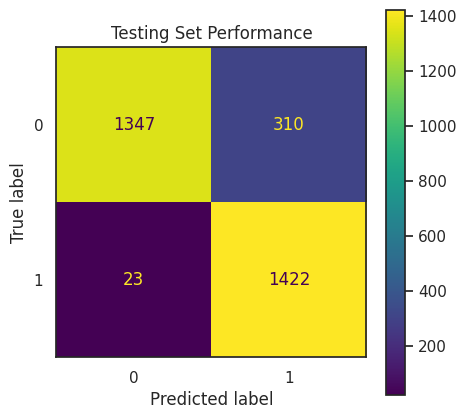

In [68]:
# Define the parameter grid for the random forest classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_

# Create a random forest classifier with the best parameters
rf_classifier_best = RandomForestClassifier(random_state=42, **best_params)

# Fit the best classifier to the training data
rf_classifier_best.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier_best.predict(X_test)

# Evaluate the model
eval_model(rf_classifier_best, X_test, y_test)

# Print the best hyperparameters found by grid search
print("Best Hyperparameters:", best_params)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)


## Umbalanced data with Attack and Defense

Test Accuracy: 0.9041713641488163

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1642
           1       0.24      0.13      0.17       132

    accuracy                           0.90      1774
   macro avg       0.58      0.55      0.56      1774
weighted avg       0.88      0.90      0.89      1774



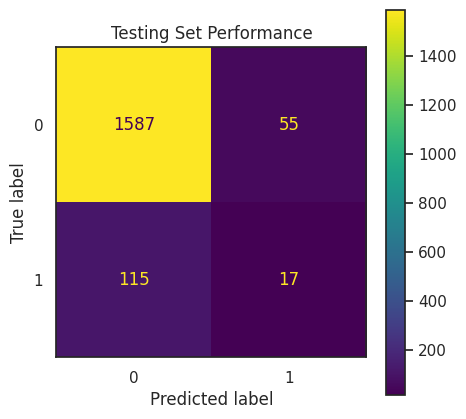

In [69]:

cleaned_df['scored'] = cleaned_df['Score'].apply(lambda x: 1 if x in [3, 5, 7] else 0)
y = cleaned_df['scored']
X = cleaned_df[selected_columns_all]

X = pd.get_dummies(X, columns=['Attack Team', 'Defense team'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest classifier on the training set
rf_classifier_unbalance_clean_at_df = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_unbalance_clean_at_df.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = rf_classifier_unbalance_clean_at_df.predict(X_test)

# Evaluate the model's performance on the test set using accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}\n')


eval_model(rf_classifier_unbalance_clean_at_df, X_test, y_test)

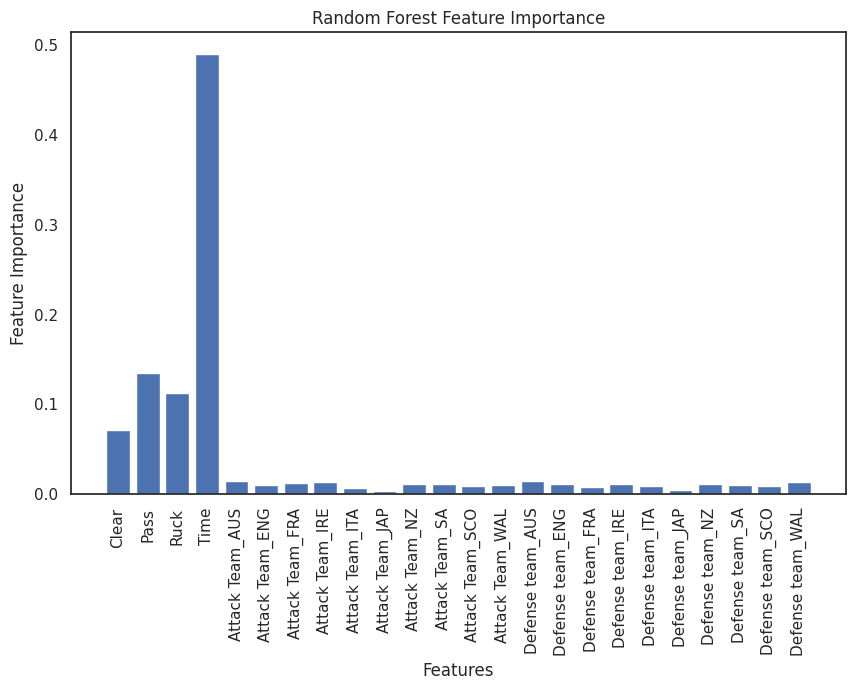

In [70]:
feature_importances = rf_classifier_unbalance_clean_at_df.feature_importances_
features_used_in_model = X_train.columns
selected_columns_all = features_used_in_model

plt.figure(figsize=(10, 6))
plt.bar(selected_columns_all, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)
plt.show()


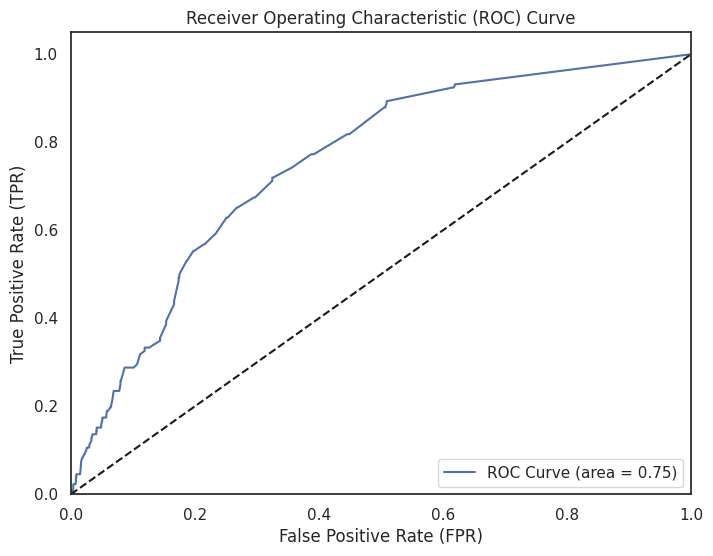

In [71]:
y_probabilities = rf_classifier_unbalance_clean_at_df.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_test, y_probabilities)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

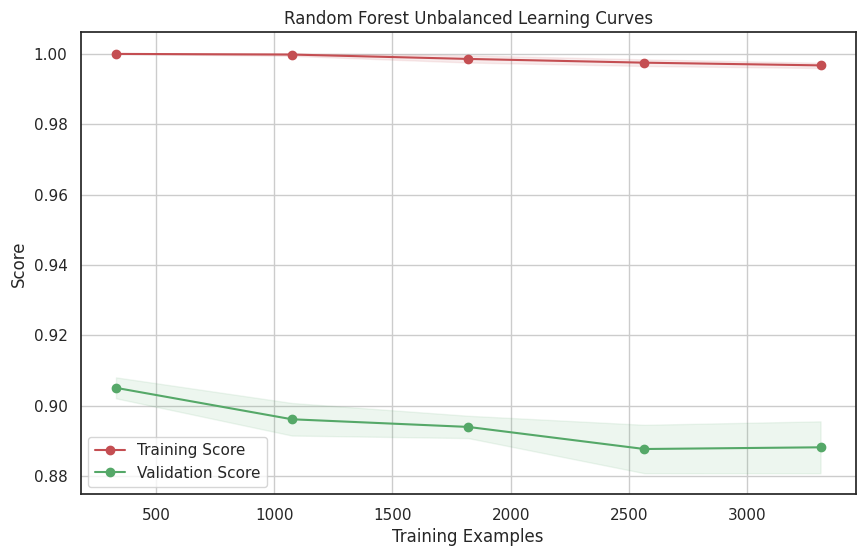

In [72]:
plot_learning_curves(rf_classifier_unbalance_clean_at_df, X_train, y_train, title="Random Forest Unbalanced Learning Curves")

In [73]:
# Create a SHAP explainer object
explainer = shap.Explainer(rf_classifier_unbalance_clean_at_df, X_train)
# Explain predictions for the entire test dataset and create a summary plot
shap_values_un_att_df = explainer.shap_values(X_test)

100%|===================| 3537/3548 [01:23<00:00]       

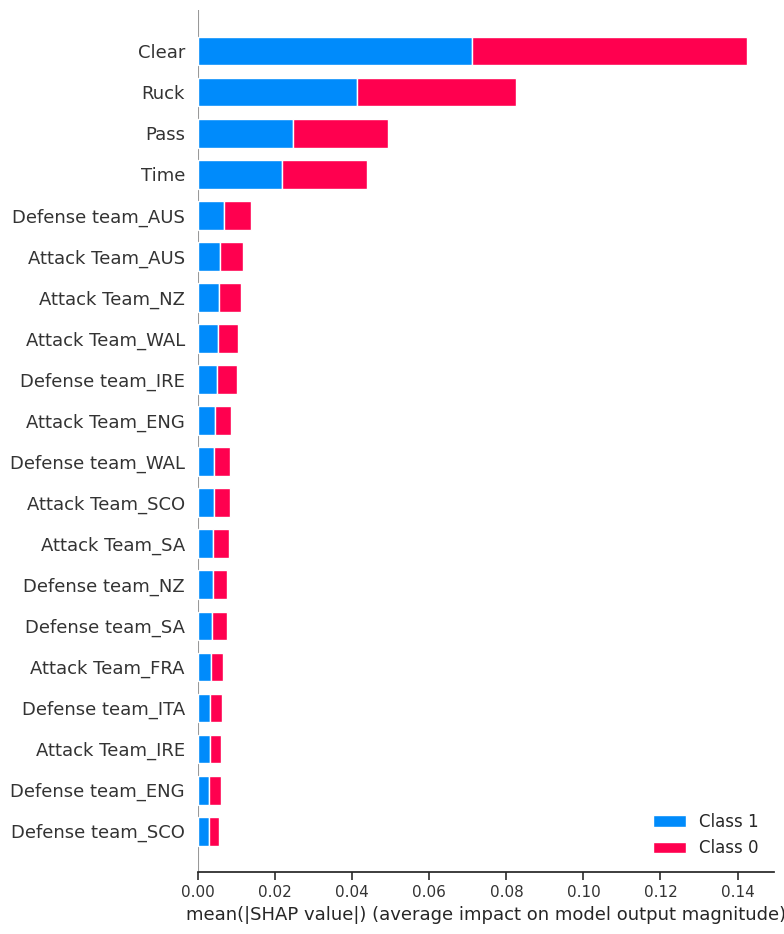

In [74]:
# Create a summary plot for the entire test dataset
shap.summary_plot(shap_values_un_att_df, X_test, feature_names=X_test.columns)

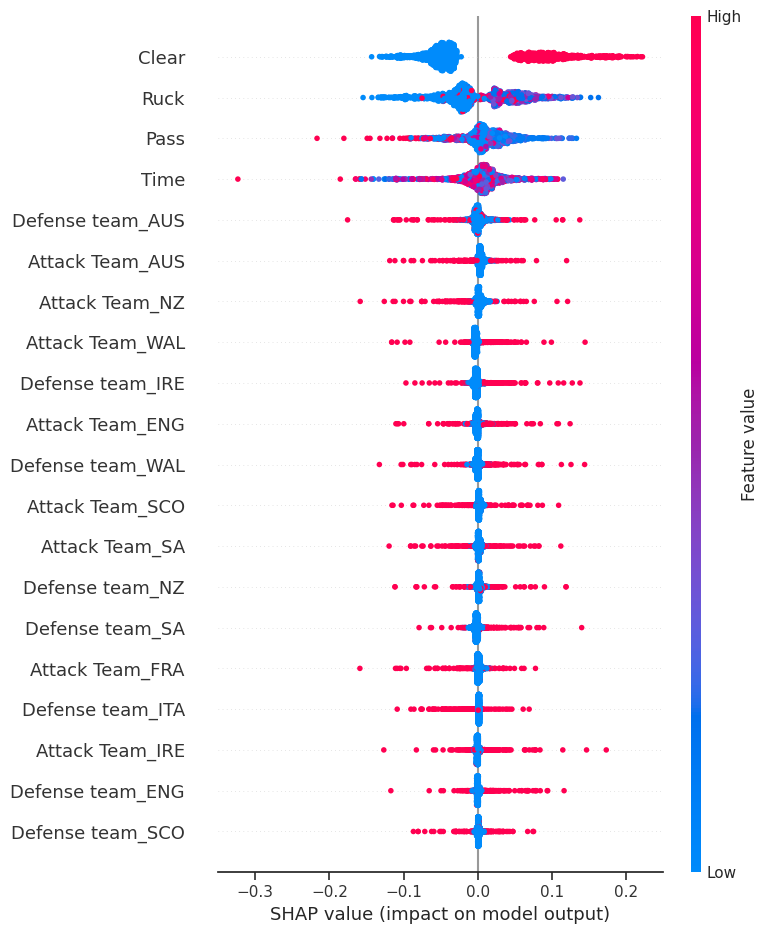

In [75]:
shap.summary_plot(shap_values_un_att_df[0], X_test)

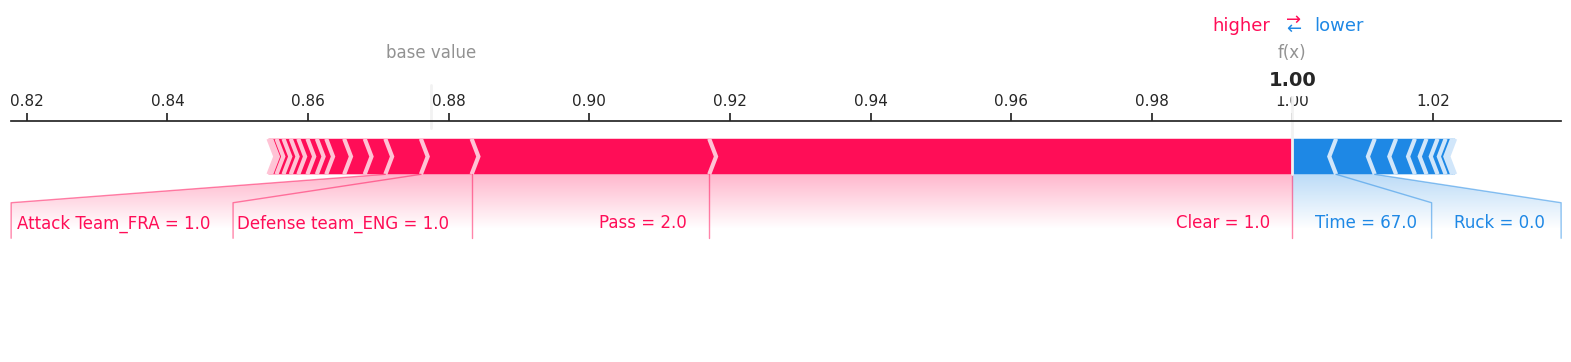

In [76]:
shap.plots.force(explainer.expected_value[0], shap_values_un_att_df[0][0,:], X_test.iloc[0, :], matplotlib = True)

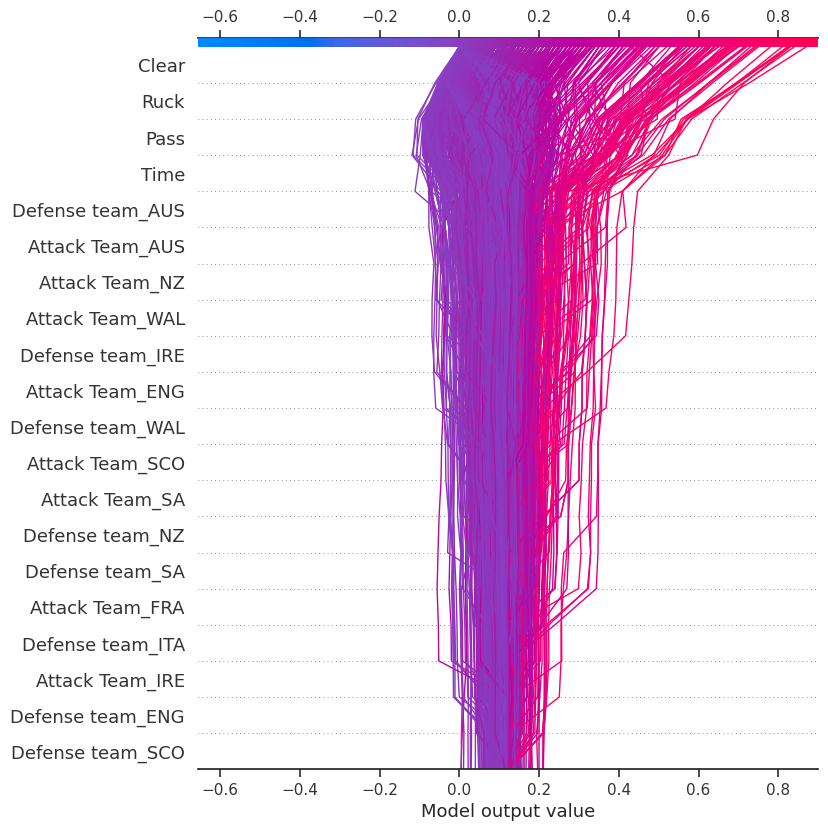

In [77]:
shap.decision_plot(explainer.expected_value[1], shap_values_un_att_df[1], X_test.columns, ignore_warnings=True, show=True)

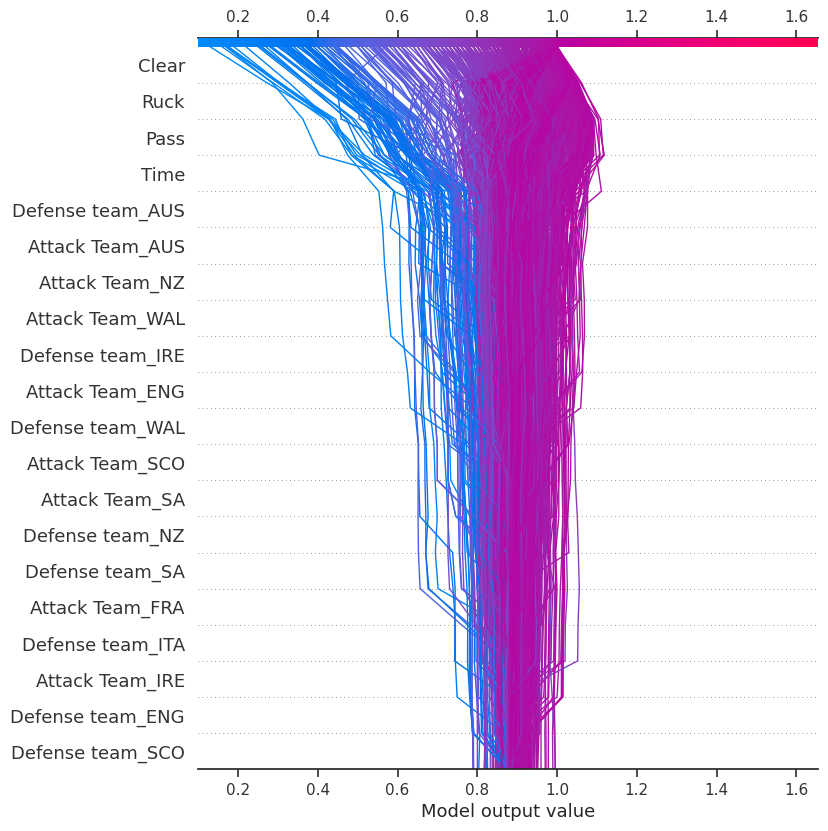

In [78]:
shap.decision_plot(explainer.expected_value[0], shap_values_un_att_df[0], X_test.columns, ignore_warnings=True, show=True)

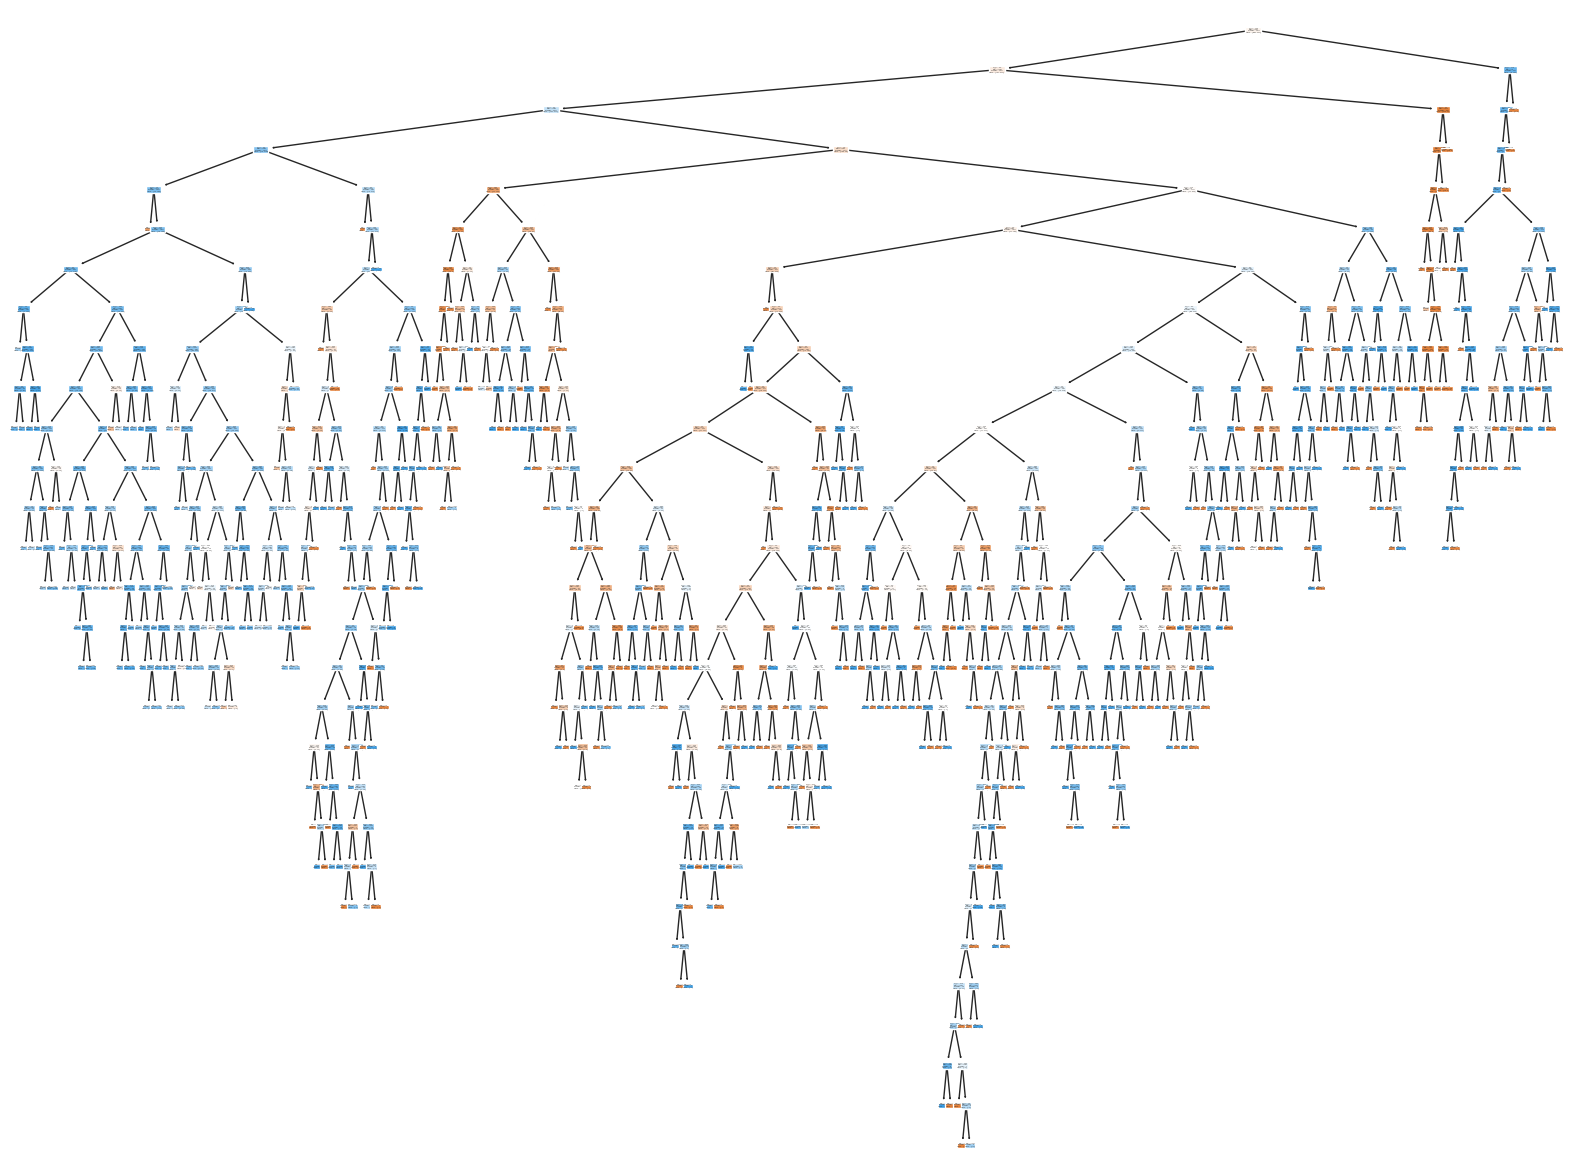

In [79]:
# Plot the decision tree from the ensemble
fig = plt.figure(figsize=(20, 15))
_ = tree.plot_tree(rf_classifier_balanced.estimators_[0], filled=True)

## Balanced data with Attack and Defense team

Test Accuracy: 0.9613152804642167

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1657
           1       0.92      1.00      0.96      1445

    accuracy                           0.96      3102
   macro avg       0.96      0.96      0.96      3102
weighted avg       0.96      0.96      0.96      3102



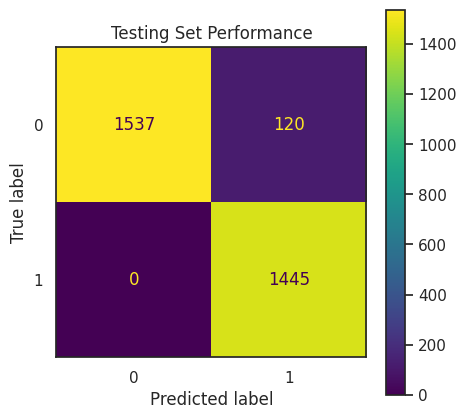

In [80]:
selected_columns_all = ["Clear", "Pass", "Ruck","Time",'Attack Team', 'Defense team']

y = balanced_df['scored']
X = balanced_df[selected_columns_all]

X = pd.get_dummies(X, columns=['Attack Team', 'Defense team'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier_balanced_with_att_def = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_balanced_with_att_def.fit(X_train, y_train)
y_pred = rf_classifier_balanced_with_att_def.predict(X_test)


test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy}\n')




eval_model(rf_classifier_balanced_with_att_def, X_test, y_test)


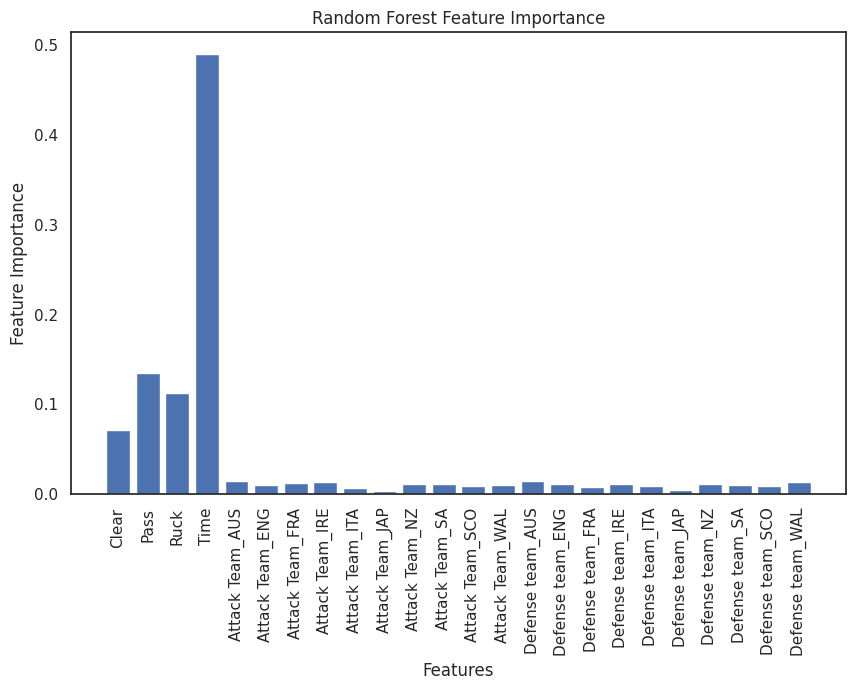

In [81]:
features_used_in_model = X_train.columns
selected_columns = features_used_in_model

plt.figure(figsize=(10, 6))
plt.bar(selected_columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)
plt.show()


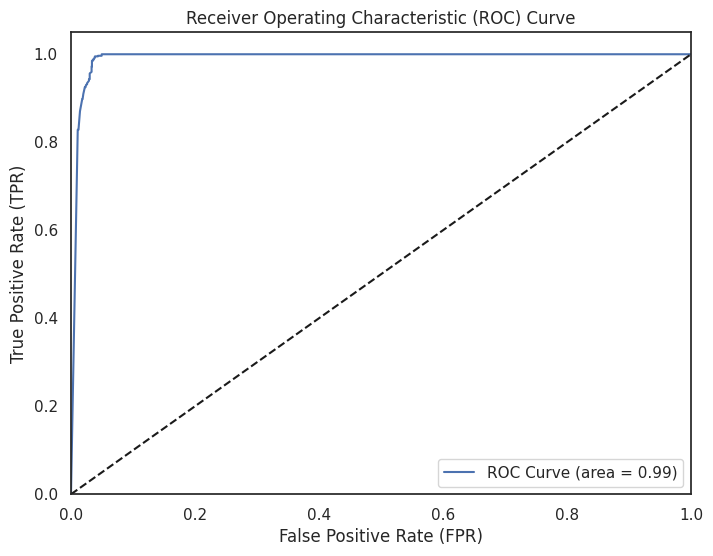

In [82]:
y_probabilities = rf_classifier_balanced_with_att_def.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_test, y_probabilities)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

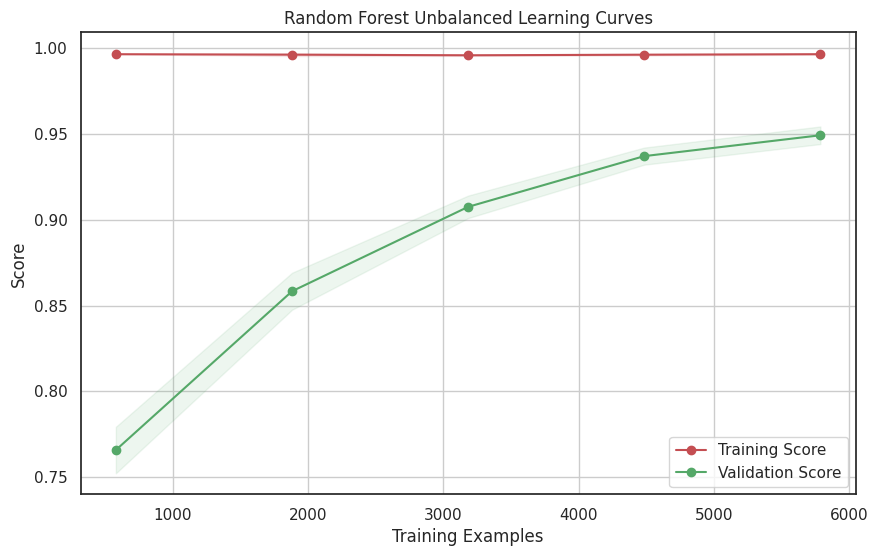

In [83]:
plot_learning_curves(rf_classifier_balanced_with_att_def, X_train, y_train, title="Random Forest Unbalanced Learning Curves")

In [84]:

explainer = shap.Explainer(rf_classifier_balanced_with_att_def, X_train)
shap_values_att_df = explainer.shap_values(X_test)

100%|===================| 6187/6204 [03:22<00:00]       

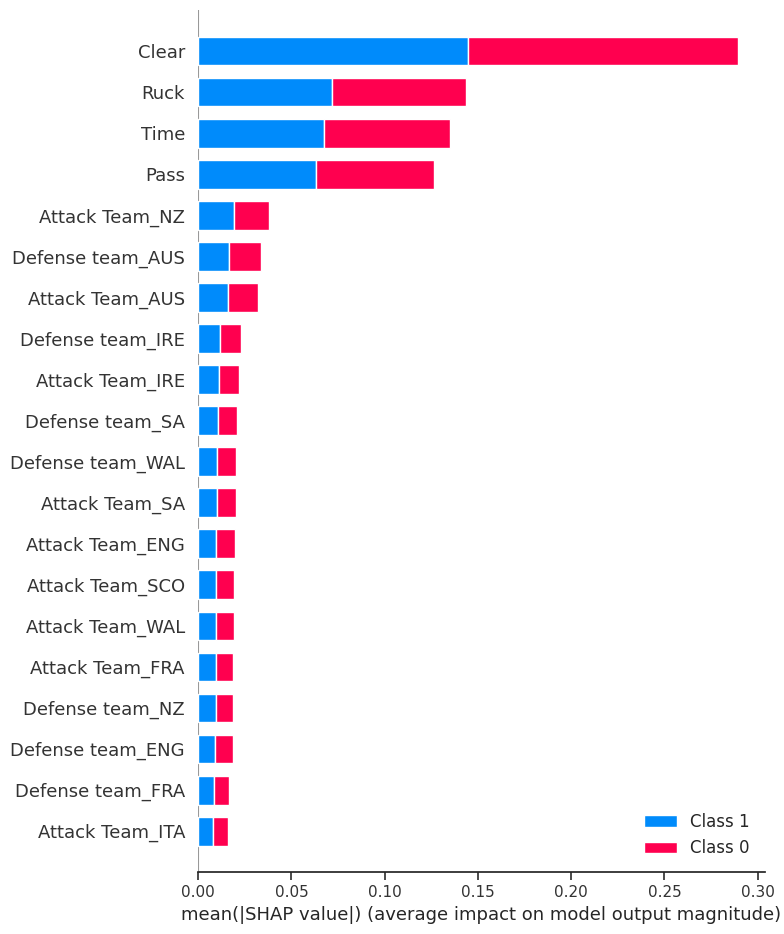

In [85]:
# Create a summary plot for the entire test dataset
shap.summary_plot(shap_values_att_df, X_test, feature_names=X_test.columns)

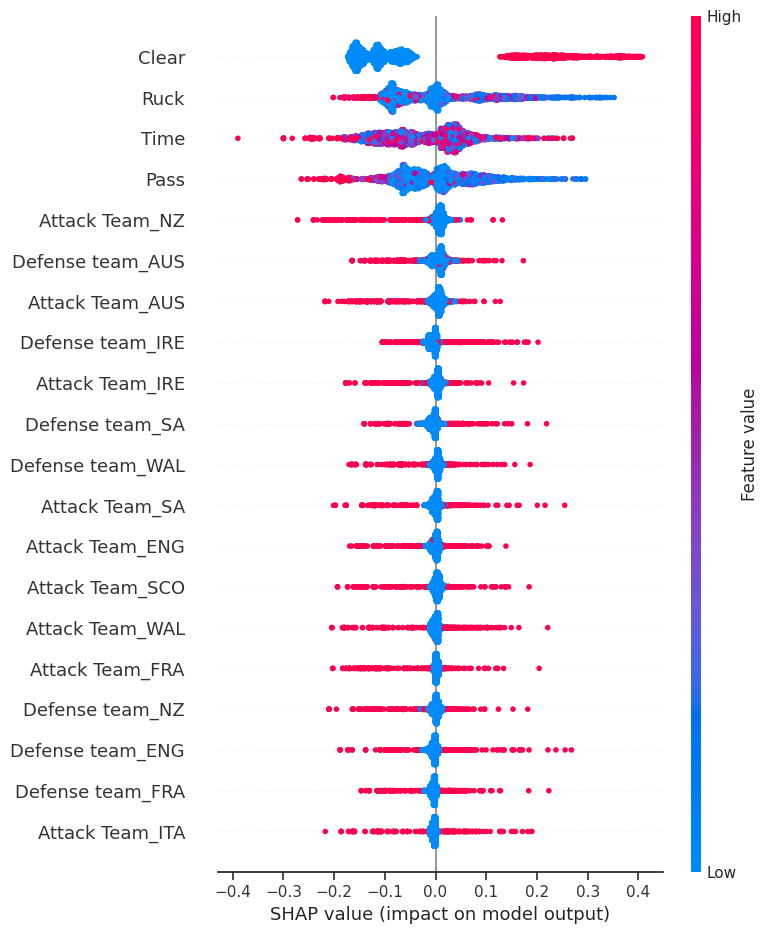

In [86]:
shap.summary_plot(shap_values_att_df[0], X_test)

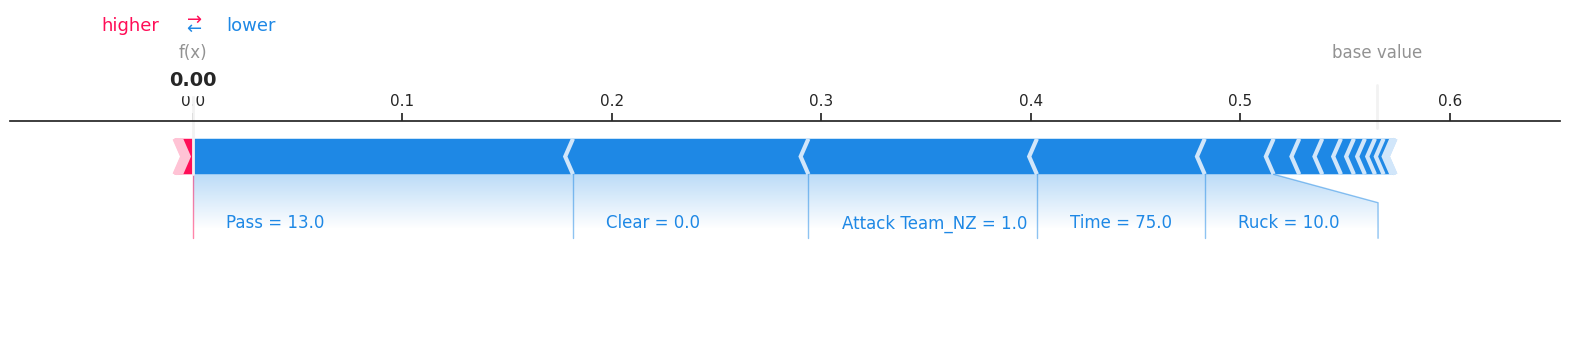

In [87]:
shap.plots.force(explainer.expected_value[0], shap_values_att_df[0][0,:], X_test.iloc[0, :], matplotlib = True)

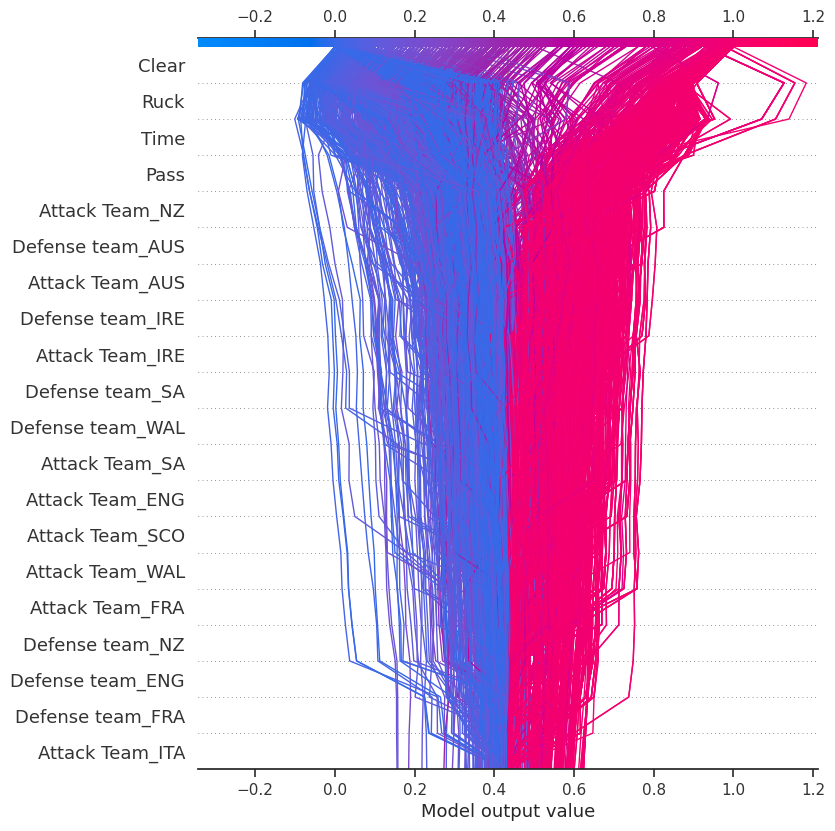

In [88]:
shap.decision_plot(explainer.expected_value[1], shap_values_att_df[1], X_test.columns, ignore_warnings=True, show=True)

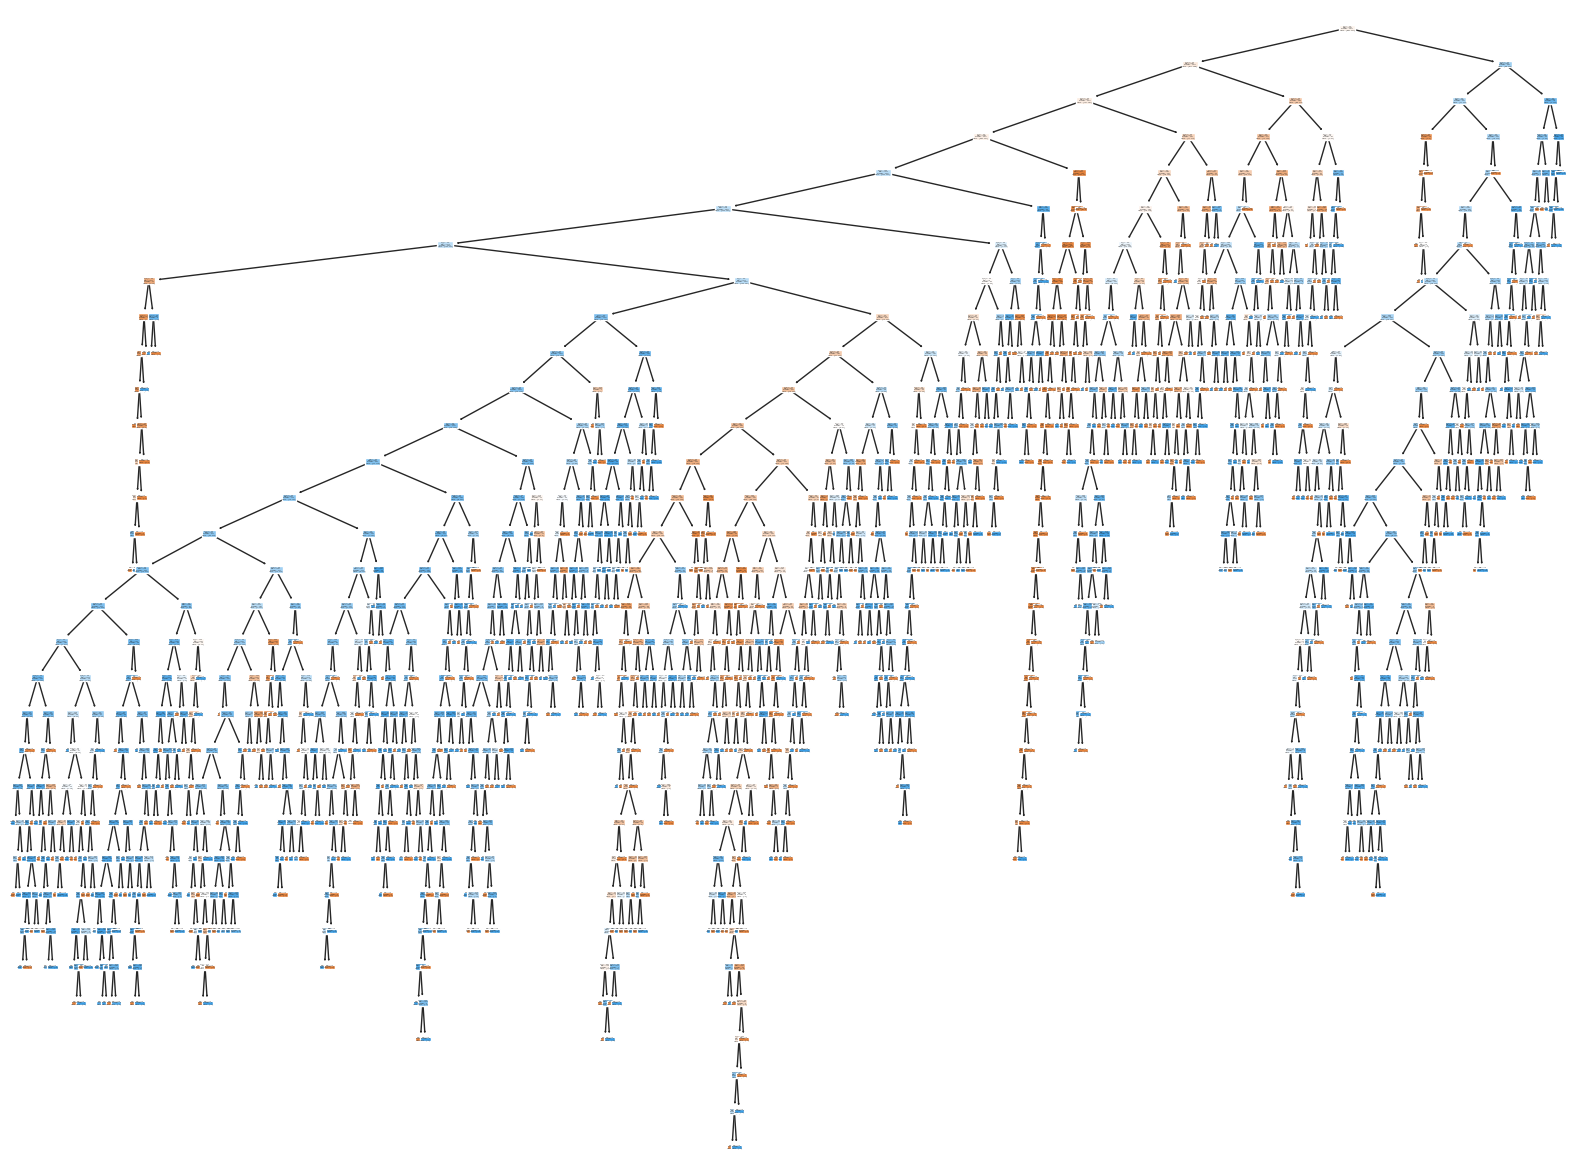

In [89]:
#Final random forest
fig = plt.figure(figsize=(20, 15))
_ = tree.plot_tree(rf_classifier_balanced_with_att_def.estimators_[0], filled=True)